In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stat 
import statsmodels.api as sm
#importation des bibliotheques necessaires

In [2]:
dfprod = pd.read_csv('products.csv')
dfclient = pd.read_csv('customers.csv')
dfvente=pd.read_csv('transactions.csv')
#importation des fichiers necessaires

# SOMMAIRE



[ANALYSES DES DONNEES](#section1)


[JOINTURE DES DONNEES](#section2)


[ANALYSES DU CHIFFRE D AFFAIRE](#section3)

                * CHIFFRES D AFFAIRE
                * MOYENNE MOBILE CA
                * ANALYSES CA COMPLEMENTAIRE PAR PRODUIT
                * ANALYSES CA COMPLEMENTAIRE PAR CATEGORIE



[ANALYSES PRODUITS](#section4)

                * COURBE DE LORENZ


[ANALYSES CLIENTS](#section5)

                * COURBE DE LORENZ


[ANALYSES DES VOLUMES](#section6)


[ANALYSES PANIERS MOYENS](#section7)

[RESULTATS SANS B2B](#section8)

[1. ANALYSE CA PAR AGE](#section9)

[2.LIAISON ENTRE LE SEXE ET LA CATEGORIE ACHETEE](#section10)

[3.LIAISON ENTRE L AGE ET LE MONTANT TOTAL DES ACHATS](#section11)

[4.LIAISON ENTRE L AGE ET LA TAILLE DU PANIER MOYEN](#section12)

[5.LIAISON ENTRE L AGE ET LA CATEGORIE ACHETEE](#section13)

[6.LIAISON ENTRE L AGE ET LA FREQUENCE ACHAT](#section14)


[ANALYSES partie2](#section15)


[ANALYSES partie3](#section16)

<a id='section1'></a>
# ANALYSE DES DONNEES

In [3]:
dfprod.info()
#observation d un potentiel probleme sur la colonne categorie qui devrait etre en object qui concerne les produits vendus par la société

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [4]:
dfprod['categ'] = dfprod['categ'].astype(object)
#changement de la categorie en object pour travailler plus tard sur les categories

In [5]:
dfprod.describe(include='all')
#il y a potentiellement des prix negatif a verifier qu'on detecte dans la colonne prix mini

,id_prod,price,categ
count,3287,3287.000000,3287.0
unique,3287,NaN,3.0
top,0_2048,NaN,0.0
freq,1,NaN,2309.0
mean,NaN,21.856641,NaN
std,NaN,29.847908,NaN
min,NaN,-1.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


In [6]:
dferreurprix =dfprod.loc[dfprod['price'] < 0]
dferreurprix.head()
#recherche de tout les prix possiblement inferieur à 0 euro/ possiblement une erreur

,id_prod,price,categ
731,T_0,-1.0,0


In [7]:
dfprod.head(15)
#avoir une lecture plus globale du df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [8]:
dfprod.groupby(by='categ').describe()
#avoir un apercu de la repartition des ventes par categorie

price                                                              
        count        mean        std    min     25%     50%     75%     max
categ                                                                      
0      2309.0   11.727280   7.568756  -1.00   5.580   10.32   16.65   40.99
1       739.0   25.531421  15.425162   2.00  13.390   22.99   33.99   80.99
2       239.0  108.354686  49.561431  30.99  71.065  101.99  136.53  300.00

In [9]:
dfprod['id_prod'].value_counts()
#approndir la vue du df

0_2048    1
0_336     1
0_2154    1
0_442     1
0_1553    1
         ..
0_1181    1
0_782     1
1_126     1
1_232     1
0_1375    1
Name: id_prod, Length: 3287, dtype: int64

In [10]:
dfclient.info()
#observation du dataframe pas de problématique au premier regard concernant des données sur les clients de la société

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [11]:
dfclient.describe(include='all')
#il y a un age maxi de 92 ans et mini de 17 ans pas d'incohérence de ce coté là 

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_6957,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [12]:
dfclient.head(15)
#avoir une lecture plus globale du df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


In [13]:
dfclient.groupby(by='sex').describe()
#peut servir pour la repartition homme-femme

birth                                                                
      count         mean        std     min     25%     50%     75%     max
sex                                                                        
f    4491.0  1977.994879  17.098242  1929.0  1966.0  1979.0  1992.0  2004.0
m    4132.0  1978.591723  16.719656  1929.0  1966.0  1980.0  1992.0  2004.0

In [14]:
dfclient.groupby(by='birth').describe()
#peut servir sur la repartition age

client_id                       sex                
          count unique     top freq count unique top freq
birth                                                    
1929          3      3  c_8362    1     3      2   m    2
1930          4      4  c_7232    1     4      2   f    3
1931          4      4   c_418    1     4      2   m    2
1932          6      6  c_2438    1     6      2   f    5
1933          8      8  c_5432    1     8      2   f    5
...         ...    ...     ...  ...   ...    ...  ..  ...
2000        136    136  c_4097    1   136      2   f   78
2001        129    129  c_5384    1   129      2   f   72
2002        146    146  c_5612    1   146      2   m   80
2003        146    146  c_2535    1   146      2   m   81
2004        440    440  c_6247    1   440      2   f  232

[76 rows x 8 columns]

In [15]:
dfvente.info()
#on observe que le date n'a pas un format datetime dur les donnees concernant les données de vente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [16]:
dfvente.describe(include='all')
#on observe qu'il y a peut etre une phase de test potentielle cf la ligne top/date  test

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [17]:
dfvente['client_id'].value_counts()
#Il y a un decalage entre le nombre de id_client du dfvente : 8602 et celui du dfclient : 8623 qu'on peut expliquer par des clients non-acheteur sur le differentiel

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
          ...  
c_4648        1
c_4223        1
c_6292        1
c_5962        1
c_4478        1
Name: client_id, Length: 8602, dtype: int64

In [18]:
dfvente['id_prod'].value_counts()
#Il y a un decallage entre le nombre de id_prod du dfvente : 3267 et celui du dfprod : 3287 qu'on peut expliquer par des produits invendus sur le differentiel

1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
          ... 
2_98         1
0_1379       1
0_549        1
0_833        1
0_1539       1
Name: id_prod, Length: 3267, dtype: int64

In [19]:
dfsearch2 =dfvente[dfvente['id_prod'].str.contains("T_0")]
print(dfsearch2)
# recherche du nombre de lignes contenant le prix negatif

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


In [20]:
dfsearch2.describe()
#verification

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


In [21]:
dfvente= dfvente[dfvente['id_prod']!='T_0']
dfvente.head(10)
#exclusion des sessions test et calcul pour verifier qu il n y a pas d erreur :  679532 moins 200 egal 679332

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


In [22]:
dfprod1 = dfprod[dfprod['id_prod']!='T_0']
#retrait du produit test dans le dataframe produit

In [23]:
dfvente.groupby(by='id_prod').describe()
#permet d avoir un apercu d'infos sur les articles

date                                         session_id         \
        count unique                         top freq      count unique   
id_prod                                                                   
0_0      1242   1242  2022-11-26 15:20:38.269758    1       1242   1238   
0_1       487    487  2021-06-22 14:14:34.781358    1        487    487   
0_10       22     22  2021-05-04 19:56:31.604361    1         22     22   
0_100       3      3  2021-11-06 20:52:21.946694    1          3      3   
0_1000    432    432  2022-05-17 12:26:55.380332    1        432    432   
...       ...    ...                         ...  ...        ...    ...   
2_95        4      4  2022-01-21 12:53:19.830445    1          4      4   
2_96      598    598  2021-08-17 02:04:18.172062    1        598    598   
2_97       13     13  2022-08-12 06:27:05.794886    1         13     13   
2_98        1      1  2021-03-08 21:10:32.250919    1          1      1   
2_99        7      7  2023-01-21 01:53:46.967570    1          7      7   

                       client_id                      
              top freq     count unique     top freq  
id_prod                                               
0_0      s_298009    2      1242    520  c_1609   65  
0_1      s_340807    1       487    230  c_1609   14  
0_10     s_135589    1        22     12  c_5790    4  
0_100     s_91041    1         3      2  c_2035    2  
0_1000    s_79907    1       432    199  c_1609   22  
...           ...  ...       ...    ...     ...  ...  
2_95       s_4537    1         4      3  c_8038    2  
2_96     s_336739    1       598    240  c_4958   41  
2_97      s_76200    1        13      5  c_2989    3  
2_98       s_3637    1         1      1  c_5967    1  
2_99      s_61009    1         7      2  c_5828    4  

[3266 rows x 12 columns]

<a id='section2'></a>
# <big><font face="'Montserrat'">JOINTURE DES DATAFRAMES</font></big>

In [24]:
dfjoin = pd.merge(dfvente,dfclient, how='outer', left_on=['client_id'], right_on=['client_id'], indicator = 'merge1')
print(dfjoin)
#jointure du fichier vente et  client avec le nombre de ligne en check

       id_prod                        date session_id client_id sex  birth  \
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   f   1986   
1       0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   f   1986   
2       0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   f   1986   
3       0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   f   1986   
4       0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   f   1986   
...        ...                         ...        ...       ...  ..    ...   
679350     NaN                         NaN        NaN    c_7584   f   1960   
679351     NaN                         NaN        NaN      c_90   m   2001   
679352     NaN                         NaN        NaN     c_587   m   1993   
679353     NaN                         NaN        NaN      ct_1   m   2001   
679354     NaN                         NaN        NaN    c_3526   m   1956   

            merge1  
0             both  
1             both  


In [25]:
dfjoin.merge1.value_counts()

both          679332
right_only        23
left_only          0
Name: merge1, dtype: int64

In [26]:
dfjoin.describe(include="all")

,id_prod,date,session_id,client_id,sex,birth,merge1
count,679332,679332,679332,679355,679355,679355.000000,679355
unique,3266,679332,342315,8623,2,NaN,2
top,1_369,2022-04-14 06:24:34.004020,s_118668,c_1609,m,NaN,both
freq,2252,1,14,25488,340941,NaN,679332
mean,NaN,NaN,NaN,NaN,NaN,1977.811411,NaN
std,NaN,NaN,NaN,NaN,NaN,13.574860,NaN
min,NaN,NaN,NaN,NaN,NaN,1929.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1970.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN


In [27]:
dfnocart= dfjoin[dfjoin['merge1']=='right_only']
print(dfnocart)
#clients qui ont rien achété vs proposer une solution commercial pour les inciter a acheter ou les cleaner apres dans la base de donnée apres relance 

       id_prod date session_id client_id sex  birth      merge1
679332     NaN  NaN        NaN    c_8253   f   2001  right_only
679333     NaN  NaN        NaN    c_3789   f   1997  right_only
679334     NaN  NaN        NaN    c_4406   f   1998  right_only
679335     NaN  NaN        NaN      ct_0   f   2001  right_only
679336     NaN  NaN        NaN    c_2706   f   1967  right_only
679337     NaN  NaN        NaN    c_3443   m   1959  right_only
679338     NaN  NaN        NaN    c_4447   m   1956  right_only
679339     NaN  NaN        NaN    c_3017   f   1992  right_only
679340     NaN  NaN        NaN    c_4086   f   1992  right_only
679341     NaN  NaN        NaN    c_6930   m   2004  right_only
679342     NaN  NaN        NaN    c_4358   m   1999  right_only
679343     NaN  NaN        NaN    c_8381   f   1965  right_only
679344     NaN  NaN        NaN    c_1223   m   1963  right_only
679345     NaN  NaN        NaN    c_6862   f   2002  right_only
679346     NaN  NaN        NaN    c_5245

In [28]:
dffinal = pd.merge(dfjoin,dfprod1, how='outer', left_on=['id_prod'], right_on=['id_prod'], indicator = 'merge2')
print(dffinal)
#regroupement de la totalité des données

       id_prod                        date session_id client_id  sex   birth  \
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103    f  1986.0   
1       0_1518  2021-07-20 13:21:29.043970    s_64849     c_103    f  1986.0   
2       0_1518  2022-08-20 13:21:29.043970   s_255965     c_103    f  1986.0   
3       0_1518  2021-05-09 11:52:55.100386    s_32104    c_6714    f  1968.0   
4       0_1518  2022-05-30 01:17:07.487046   s_216118    c_6714    f  1968.0   
...        ...                         ...        ...       ...  ...     ...   
679371  0_1624                         NaN        NaN       NaN  NaN     NaN   
679372    2_86                         NaN        NaN       NaN  NaN     NaN   
679373   0_299                         NaN        NaN       NaN  NaN     NaN   
679374   0_510                         NaN        NaN       NaN  NaN     NaN   
679375  0_2308                         NaN        NaN       NaN  NaN     NaN   

       merge1   price categ      merge2

In [29]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679376 entries, 0 to 679375
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679353 non-null  object  
 1   date        679332 non-null  object  
 2   session_id  679332 non-null  object  
 3   client_id   679355 non-null  object  
 4   sex         679355 non-null  object  
 5   birth       679355 non-null  float64 
 6   merge1      679355 non-null  category
 7   price       679132 non-null  float64 
 8   categ       679132 non-null  object  
 9   merge2      679376 non-null  category
dtypes: category(2), float64(2), object(6)
memory usage: 47.9+ MB


In [30]:
dffinal['date']= pd.to_datetime(dffinal['date'])
#transformation de la colonne date en donnée temporelle

In [31]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679376 entries, 0 to 679375
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679355 non-null  object        
 4   sex         679355 non-null  object        
 5   birth       679355 non-null  float64       
 6   merge1      679355 non-null  category      
 7   price       679132 non-null  float64       
 8   categ       679132 non-null  object        
 9   merge2      679376 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), object(5)
memory usage: 47.9+ MB


In [32]:
dffinal['format']= dffinal['date'].dt.date
dffinal.head(30)

,id_prod,date,session_id,client_id,sex,birth,merge1,price,categ,merge2,format
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,both,4.18,0,both,2021-05-09
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,both,4.18,0,both,2022-05-30
5,0_1518,2023-02-09 11:52:55.100386,s_339104,c_6714,f,1968.0,both,4.18,0,both,2023-02-09
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,both,4.18,0,both,2021-10-23
7,0_1518,2022-10-30 01:17:07.487046,s_289949,c_6714,f,1968.0,both,4.18,0,both,2022-10-30
8,0_1518,2022-05-09 11:52:55.100386,s_205930,c_6714,f,1968.0,both,4.18,0,both,2022-05-09
9,0_1518,2021-04-30 01:17:07.487046,s_27717,c_6714,f,1968.0,both,4.18,0,both,2021-04-30


In [33]:
dffinal.merge2.value_counts()

both          679111
left_only        244
right_only        21
Name: merge2, dtype: int64

In [34]:
dfinvendu= dffinal[dffinal['merge2']=='right_only']
dfinvendu.head(21)

,id_prod,date,session_id,client_id,sex,birth,merge1,price,categ,merge2,format
679355,0_1016,NaT,NaN,NaN,NaN,NaN,NaN,35.06,0,right_only,NaT
679356,0_1780,NaT,NaN,NaN,NaN,NaN,NaN,1.67,0,right_only,NaT
679357,0_1062,NaT,NaN,NaN,NaN,NaN,NaN,20.08,0,right_only,NaT
679358,0_1119,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only,NaT
679359,0_1014,NaT,NaN,NaN,NaN,NaN,NaN,1.15,0,right_only,NaT
679360,1_0,NaT,NaN,NaN,NaN,NaN,NaN,31.82,1,right_only,NaT
679361,0_1318,NaT,NaN,NaN,NaN,NaN,NaN,20.92,0,right_only,NaT
679362,0_1800,NaT,NaN,NaN,NaN,NaN,NaN,22.05,0,right_only,NaT
679363,0_1645,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only,NaT
679364,0_322,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only,NaT


In [35]:
dfinvendu=dfinvendu[['id_prod','price', 'categ']]
dfinvendu.head(21)

,id_prod,price,categ
679355,0_1016,35.06,0
679356,0_1780,1.67,0
679357,0_1062,20.08,0
679358,0_1119,2.99,0
679359,0_1014,1.15,0
679360,1_0,31.82,1
679361,0_1318,20.92,0
679362,0_1800,22.05,0
679363,0_1645,2.99,0
679364,0_322,2.99,0


In [36]:
dfvisu=dffinal[dffinal['merge2']=='left_only']
print(dfvisu)

       id_prod                       date session_id client_id sex   birth  \
311747  0_2245 2021-04-22 04:57:20.090378    s_23987    c_6714   f  1968.0   
311748  0_2245 2021-06-05 17:04:43.982913    s_44481    c_6714   f  1968.0   
311749  0_2245 2022-04-05 17:04:43.982913   s_189669    c_6714   f  1968.0   
311750  0_2245 2022-05-05 17:04:43.982913   s_204093    c_6714   f  1968.0   
311751  0_2245 2022-12-05 17:04:43.982913   s_307520    c_6714   f  1968.0   
...        ...                        ...        ...       ...  ..     ...   
679350     NaN                        NaT        NaN    c_7584   f  1960.0   
679351     NaN                        NaT        NaN      c_90   m  2001.0   
679352     NaN                        NaT        NaN     c_587   m  1993.0   
679353     NaN                        NaT        NaN      ct_1   m  2001.0   
679354     NaN                        NaT        NaN    c_3526   m  1956.0   

            merge1  price categ     merge2      format  
311747

In [37]:
visu= dfvisu.isnull().sum()
visu

id_prod        23
date           23
session_id     23
client_id       0
sex             0
birth           0
merge1          0
price         244
categ         244
merge2          0
format         23
dtype: int64

In [38]:
dfvisu.loc[dfvisu['price'].isnull(),:]

,id_prod,date,session_id,client_id,sex,birth,merge1,price,categ,merge2,format
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,both,NaN,NaN,left_only,2021-04-22
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,both,NaN,NaN,left_only,2021-06-05
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-04-05
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-05-05
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-12-05
...,...,...,...,...,...,...,...,...,...,...,...
679350,NaN,NaT,NaN,c_7584,f,1960.0,right_only,NaN,NaN,left_only,NaT
679351,NaN,NaT,NaN,c_90,m,2001.0,right_only,NaN,NaN,left_only,NaT
679352,NaN,NaT,NaN,c_587,m,1993.0,right_only,NaN,NaN,left_only,NaT
679353,NaN,NaT,NaN,ct_1,m,2001.0,right_only,NaN,NaN,left_only,NaT


In [39]:
reliquat = dfvisu.loc[dfvisu['id_prod'] == '0_2245', :]
reliquat

,id_prod,date,session_id,client_id,sex,birth,merge1,price,categ,merge2,format
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,both,NaN,NaN,left_only,2021-04-22
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,both,NaN,NaN,left_only,2021-06-05
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-04-05
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-05-05
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,both,NaN,NaN,left_only,2022-12-05
...,...,...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,both,NaN,NaN,left_only,2021-10-19
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,both,NaN,NaN,left_only,2021-11-12
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,both,NaN,NaN,left_only,2021-08-22
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,both,NaN,NaN,left_only,2022-04-22


In [40]:
dffinal=dffinal[dffinal['id_prod']!='0_2245']
#mise de coté des 221 lignes sur l'ensemble pas d'incidence sur les resultats vs catégorie 0 a faible valeur en terme de CA EN MOYENNE 10Euros

In [41]:
dffinal.rename(columns={'price': 'montant_en_euros'}, inplace=True)
#changement du nom de la colonne prix pour faciliter la compréhension

In [42]:
dffinal['annee']= (dffinal['date'].dt.year)
dffinal.head(20)
#création d'une colonne année pour usage ulterieur

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20,2022.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20,2021.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20,2022.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,both,4.18,0,both,2021-05-09,2021.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,both,4.18,0,both,2022-05-30,2022.0
5,0_1518,2023-02-09 11:52:55.100386,s_339104,c_6714,f,1968.0,both,4.18,0,both,2023-02-09,2023.0
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,both,4.18,0,both,2021-10-23,2021.0
7,0_1518,2022-10-30 01:17:07.487046,s_289949,c_6714,f,1968.0,both,4.18,0,both,2022-10-30,2022.0
8,0_1518,2022-05-09 11:52:55.100386,s_205930,c_6714,f,1968.0,both,4.18,0,both,2022-05-09,2022.0
9,0_1518,2021-04-30 01:17:07.487046,s_27717,c_6714,f,1968.0,both,4.18,0,both,2021-04-30,2021.0


In [43]:
dffinal['mois']= (dffinal['date'].dt.month)
dffinal.head(20)
#création d'une colonne mois pour usage ulterieur

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee,mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20,2022.0,5.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20,2021.0,7.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20,2022.0,8.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,both,4.18,0,both,2021-05-09,2021.0,5.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,both,4.18,0,both,2022-05-30,2022.0,5.0
5,0_1518,2023-02-09 11:52:55.100386,s_339104,c_6714,f,1968.0,both,4.18,0,both,2023-02-09,2023.0,2.0
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,both,4.18,0,both,2021-10-23,2021.0,10.0
7,0_1518,2022-10-30 01:17:07.487046,s_289949,c_6714,f,1968.0,both,4.18,0,both,2022-10-30,2022.0,10.0
8,0_1518,2022-05-09 11:52:55.100386,s_205930,c_6714,f,1968.0,both,4.18,0,both,2022-05-09,2022.0,5.0
9,0_1518,2021-04-30 01:17:07.487046,s_27717,c_6714,f,1968.0,both,4.18,0,both,2021-04-30,2021.0,4.0


In [44]:
dffinal['semaine']= (dffinal['date'].dt.isocalendar().week)
dffinal.head(20)
#création d'une colonne pour usage ulterieur

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee,mois,semaine
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20,2022.0,5.0,20
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20,2021.0,7.0,29
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20,2022.0,8.0,33
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,both,4.18,0,both,2021-05-09,2021.0,5.0,18
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,both,4.18,0,both,2022-05-30,2022.0,5.0,22
5,0_1518,2023-02-09 11:52:55.100386,s_339104,c_6714,f,1968.0,both,4.18,0,both,2023-02-09,2023.0,2.0,6
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,both,4.18,0,both,2021-10-23,2021.0,10.0,42
7,0_1518,2022-10-30 01:17:07.487046,s_289949,c_6714,f,1968.0,both,4.18,0,both,2022-10-30,2022.0,10.0,43
8,0_1518,2022-05-09 11:52:55.100386,s_205930,c_6714,f,1968.0,both,4.18,0,both,2022-05-09,2022.0,5.0,19
9,0_1518,2021-04-30 01:17:07.487046,s_27717,c_6714,f,1968.0,both,4.18,0,both,2021-04-30,2021.0,4.0,17


In [45]:
dffinal['age'] = dffinal['birth']-2021
dffinal['age'] = dffinal['age'].abs()
dffinal.head()
#création d'un champs calculé de l'age des clients pour répondre aux demandes ultérieur

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee,mois,semaine,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20,2022.0,5.0,20,35.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20,2021.0,7.0,29,35.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20,2022.0,8.0,33,35.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,both,4.18,0,both,2021-05-09,2021.0,5.0,18,53.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,both,4.18,0,both,2022-05-30,2022.0,5.0,22,53.0


<a id='section3'></a>
# <big><font face="'Montserrat'" color="#5ec962">ANALYSES DU CHIFFRE D AFFAIRE</font></big>


In [46]:
caannuel=dffinal.groupby('annee' )['montant_en_euros'].sum().round()
caannuel = caannuel.reset_index()
print(caannuel)
#calcul du ca annuel et en cours avec b2b

    annee  montant_en_euros
0  2021.0         4770827.0
1  2022.0         6108682.0
2  2023.0          974220.0


(array([0, 1, 2]),
 [Text(0, 0, '2021.0'), Text(1, 0, '2022.0'), Text(2, 0, '2023.0')])

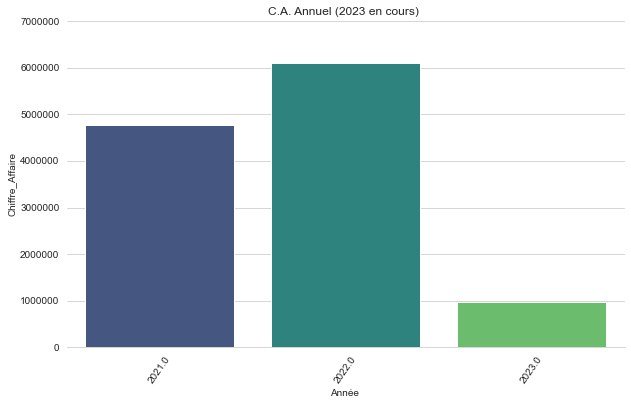

In [47]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcaannuel= sns.barplot(x= 'annee', y='montant_en_euros', data= caannuel, palette = 'viridis')
graphcaannuel.set(xlabel='Année ', ylabel='Chiffre_Affaire', title='C.A. Annuel (2023 en cours) ')
sns.despine(top= True,right= True, left = True)
graphcaannuel.set(ylim=(0,7000000))
graphcaannuel.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
#graphique du ca annuel et en cours avec b2b

In [48]:
dfcaquarter = dffinal.resample('Q', on='date').agg({'montant_en_euros':'sum'}).reset_index().round()
dfcaquarter.head(9)
#CA PAR TRIMESTRE

,date,montant_en_euros
0,2021-03-31,482441.0
1,2021-06-30,1453141.0
2,2021-09-30,1472361.0
3,2021-12-31,1362884.0
4,2022-03-31,1576367.0
5,2022-06-30,1506148.0
6,2022-09-30,1511365.0
7,2022-12-31,1514802.0
8,2023-03-31,974220.0


(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

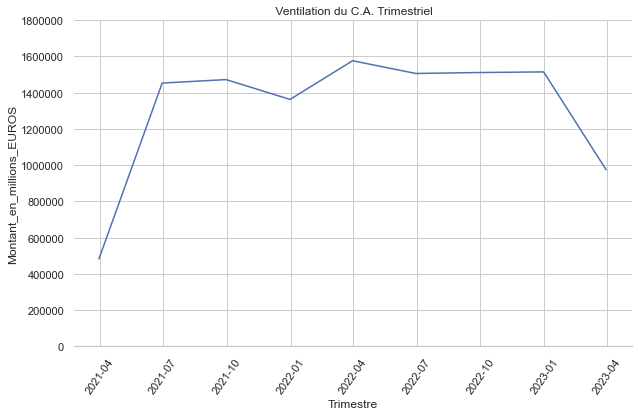

In [49]:
plt.figure(figsize=(10,6))
sns.set_theme(style="ticks")
sns.set_style("whitegrid")
graphcaQ=sns.lineplot(data=dfcaquarter, x="date", y="montant_en_euros", palette= 'viridis')  
graphcaQ.set(xlabel='Trimestre', ylabel='Montant_en_millions_EUROS', title=' Ventilation du C.A. Trimestriel')
graphcaQ.set(ylim=(0,1800000))
sns.despine(top= True,right= True, left = True)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
#GRAPH SUR CA TRIMESTRIEL

In [50]:
cam = dffinal.resample('M', on='date').montant_en_euros.sum().reset_index()
cam.head(21)
#obtention du chiffre d'affaire mensuel

,date,montant_en_euros
0,2021-03-31,482440.61
1,2021-04-30,476109.30
2,2021-05-31,492943.47
3,2021-06-30,484088.56
4,2021-07-31,482835.40
5,2021-08-31,482284.79
6,2021-09-30,507240.68
7,2021-10-31,320798.74
8,2021-11-30,516167.73
9,2021-12-31,525917.28


(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

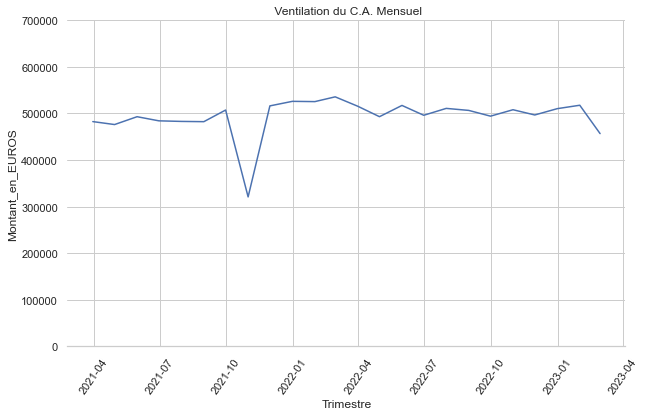

In [51]:
plt.figure(figsize=(10,6))
sns.set_theme(style="ticks")
sns.set_style("whitegrid")
graphcaMM=sns.lineplot(data=cam, x="date", y='montant_en_euros', palette= 'viridis')  
graphcaMM.set(xlabel='Trimestre', ylabel='Montant_en_EUROS', title=' Ventilation du C.A. Mensuel')
graphcaMM.set(ylim=(0,700000))
sns.despine(top= True,right= True, left = True)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
#GRAPH SUR CA TRIMESTRIEL

In [52]:
dfcamois1 = dffinal[dffinal['categ']==0].resample('M', on='date').agg({'montant_en_euros':'sum','id_prod':'count','client_id':'nunique','format':'nunique'}).round()
dfcamois1.head(25)
#CA MENSUEL de la categ 0

,montant_en_euros,id_prod,client_id,format
date,,,,
2021-03-31,193629.0,18131,4286,31
2021-04-30,205222.0,19342,4373,30
2021-05-31,196187.0,18501,4255,31
2021-06-30,167943.0,15898,4103,30
2021-07-31,144751.0,13578,3933,31
2021-08-31,167738.0,15728,4121,31
2021-09-30,246354.0,23142,4514,30
2021-10-31,199251.0,18762,4340,31
2021-11-30,155910.0,14600,4035,30


(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

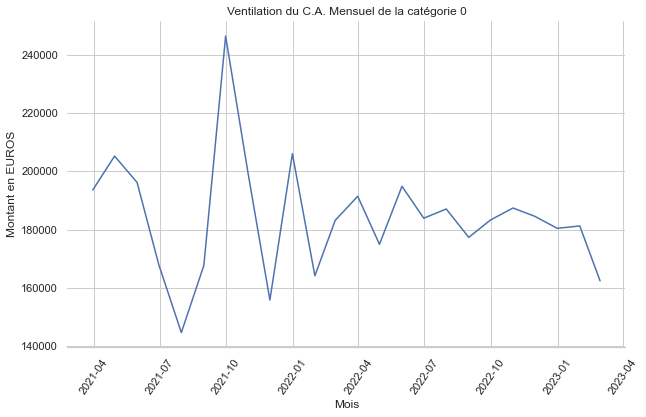

In [53]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcamois =sns.lineplot(data=dfcamois1, x="date", y="montant_en_euros", palette= 'viridis')
graphcamois.set(xlabel='Mois', ylabel='Montant en EUROS', title='Ventilation du C.A. Mensuel de la catégorie 0')
sns.despine(top= True, left = True,right= True)
plt.xticks(rotation=55)
#GRAPH SUR LE CA MENSUEL sur la catégorie 0

In [54]:
caweek = dffinal.resample('W', on='date').agg({'montant_en_euros':'sum','id_prod':'nunique'}).reset_index().round()
caweek.head(50)
#CA HEBDOMADAIRE

,date,montant_en_euros,id_prod
0,2021-03-07,110463.0,1608
1,2021-03-14,105693.0,1614
2,2021-03-21,112059.0,1638
3,2021-03-28,109441.0,1624
4,2021-04-04,107896.0,1623
5,2021-04-11,112152.0,1666
6,2021-04-18,108561.0,1660
7,2021-04-25,112799.0,1636
8,2021-05-02,110676.0,1656
9,2021-05-09,115404.0,1660


(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

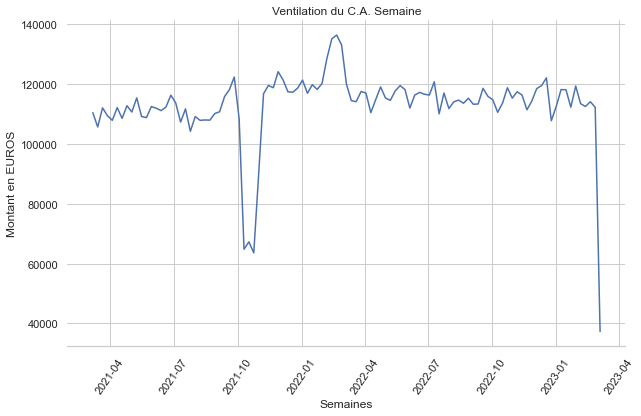

In [55]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcaweek =sns.lineplot(data=caweek, x="date", y="montant_en_euros", palette='viridis')
graphcaweek.set(xlabel='Semaines', ylabel='Montant en EUROS', title='Ventilation du C.A. Semaine')
sns.despine(top= True, left = True,right= True)
plt.xticks(rotation=55)
#GRAPH CA HEBDOMADAIRE

# <big><font face="'Montserrat'" color="#21918c">MOYENNE MOBILE DU CA</font></big>

In [56]:
cam['CA_moyen_mensuel']= cam['montant_en_euros'].rolling(6).mean()
cam.head(50)
#lissage ca mois

,date,montant_en_euros,CA_moyen_mensuel
0,2021-03-31,482440.61,NaN
1,2021-04-30,476109.30,NaN
2,2021-05-31,492943.47,NaN
3,2021-06-30,484088.56,NaN
4,2021-07-31,482835.40,NaN
5,2021-08-31,482284.79,483450.355000
6,2021-09-30,507240.68,487583.700000
7,2021-10-31,320798.74,461698.606667
8,2021-11-30,516167.73,465569.316667
9,2021-12-31,525917.28,472540.770000


In [57]:
cam= cam.rename(columns={'montant_en_euros': 'CA_réel_mensuel'})
#rename de la colonne

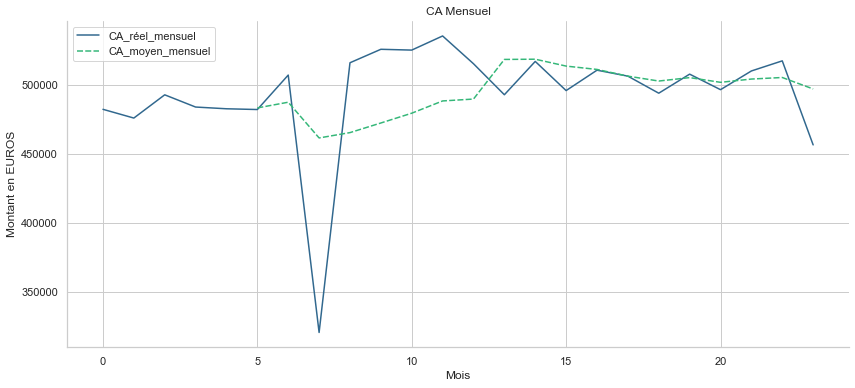

In [58]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphbb= sns.lineplot(data=cam,palette= 'viridis')
graphbb.set(xlabel='Mois', ylabel='Montant en EUROS', title='CA Mensuel')
sns.despine(top= True, right= True)
#graph du lissage CA mois

In [59]:
caweek['CA_lissé_hebdo']= caweek['montant_en_euros'].rolling(7).mean()
#lissage CA semaine

In [60]:
caweek2 = caweek[['date', 'montant_en_euros','CA_lissé_hebdo']]

In [61]:
caweek2= caweek2.rename(columns={'montant_en_euros': 'CA_réel_hebdo'})

In [62]:
caweek2.head(50)

,date,CA_réel_hebdo,CA_lissé_hebdo
0,2021-03-07,110463.0,NaN
1,2021-03-14,105693.0,NaN
2,2021-03-21,112059.0,NaN
3,2021-03-28,109441.0,NaN
4,2021-04-04,107896.0,NaN
5,2021-04-11,112152.0,NaN
6,2021-04-18,108561.0,109466.428571
7,2021-04-25,112799.0,109800.142857
8,2021-05-02,110676.0,110512.000000
9,2021-05-09,115404.0,110989.857143


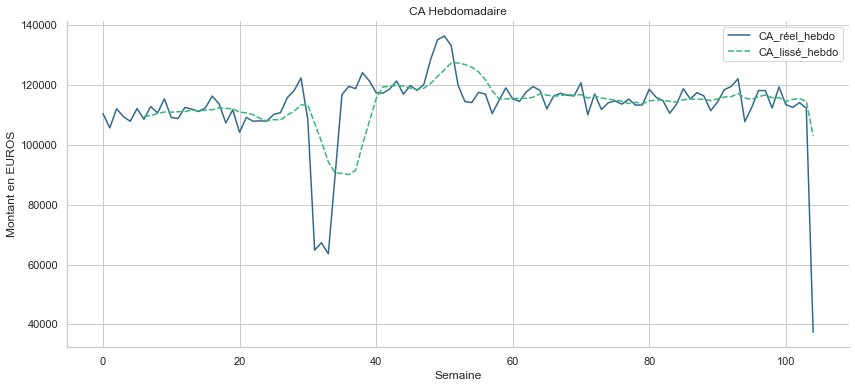

In [63]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphbb= sns.lineplot(data=caweek2,palette= 'viridis')
graphbb.set(xlabel='Semaine', ylabel='Montant en EUROS', title='CA Hebdomadaire')
sns.despine(top= True, right= True)
#graph lissage CA semaine

# <big><font face="'Montserrat'" color="#21918c">ANALYSES CA COMPLEMENTAIRE PAR PRODUIT</font></big>

In [64]:
dfcabpw = dffinal.groupby(['id_prod', pd.Grouper(key='date', freq='W-MON')])['montant_en_euros'].sum()
dfcabpw = dfcabpw.reset_index()
print(dfcabpw)
#ca produit par semaine

       id_prod       date  montant_en_euros
0          0_0 2021-03-01              3.75
1          0_0 2021-03-08             22.50
2          0_0 2021-03-15             52.50
3          0_0 2021-03-22             41.25
4          0_0 2021-03-29             22.50
...        ...        ...               ...
168855    2_99 2022-05-23             84.99
168856    2_99 2022-07-25             84.99
168857    2_99 2022-11-14             84.99
168858    2_99 2022-12-12             84.99
168859    2_99 2023-01-23             84.99

[168860 rows x 3 columns]


In [65]:
dfcabpm = dffinal.groupby(['id_prod', pd.Grouper(key='date', freq='M')])['montant_en_euros'].sum()
dfcabpm = dfcabpm.reset_index()
print(dfcabpm)
#ca produit par mois

      id_prod       date  montant_en_euros
0         0_0 2021-03-31            150.00
1         0_0 2021-04-30            273.75
2         0_0 2021-05-31            217.50
3         0_0 2021-06-30            195.00
4         0_0 2021-07-31            183.75
...       ...        ...               ...
58871    2_99 2022-05-31             84.99
58872    2_99 2022-07-31             84.99
58873    2_99 2022-11-30             84.99
58874    2_99 2022-12-31             84.99
58875    2_99 2023-01-31             84.99

[58876 rows x 3 columns]


In [66]:
dfcabpq = dffinal.groupby(['id_prod', pd.Grouper(key='date', freq='Q')])['montant_en_euros'].sum()
dfcabpq = dfcabpq.reset_index()
print(dfcabpq)
#ca produit par trimestre

      id_prod       date  montant_en_euros
0         0_0 2021-03-31            150.00
1         0_0 2021-06-30            686.25
2         0_0 2021-09-30            562.50
3         0_0 2021-12-31            573.75
4         0_0 2022-03-31            540.00
...       ...        ...               ...
26007    2_99 2021-12-31             84.99
26008    2_99 2022-06-30             84.99
26009    2_99 2022-09-30             84.99
26010    2_99 2022-12-31            169.98
26011    2_99 2023-03-31             84.99

[26012 rows x 3 columns]


In [67]:
dfcabpy = dffinal.groupby(['id_prod', pd.Grouper(key='date', freq='y')])['montant_en_euros'].sum()
dfcabpy = dfcabpy.reset_index()
print(dfcabpy)
#ca produit par an

     id_prod       date  montant_en_euros
0        0_0 2021-12-31           1972.50
1        0_0 2022-12-31           2317.50
2        0_0 2023-12-31            367.50
3        0_1 2021-12-31           2274.93
4        0_1 2022-12-31           2670.57
...      ...        ...               ...
9259    2_97 2022-12-31           1609.90
9260    2_98 2021-12-31            149.74
9261    2_99 2021-12-31            169.98
9262    2_99 2022-12-31            339.96
9263    2_99 2023-12-31             84.99

[9264 rows x 3 columns]


# <big><font face="'Montserrat'" color="#21918c">ANALYSES CA COMPLEMENTAIRE PAR CATEGORIE</font></big>

In [68]:
dfcabcw=dffinal.groupby(['categ', pd.Grouper(key='date', freq='W-MON')])['montant_en_euros'].sum()
dfcabcw = dfcabcw.reset_index()
print(dfcabcw)
#ca par categ par semaine

     categ       date  montant_en_euros
0        0 2021-03-01           6262.65
1        0 2021-03-08          43673.45
2        0 2021-03-15          44207.43
3        0 2021-03-22          44474.82
4        0 2021-03-29          42866.18
..     ...        ...               ...
310      2 2023-02-06          29922.95
311      2 2023-02-13          29115.89
312      2 2023-02-20          29610.92
313      2 2023-02-27          26776.37
314      2 2023-03-06           3977.04

[315 rows x 3 columns]


In [69]:
dfcabcm=dffinal.groupby(['categ', pd.Grouper(key='date', freq='M')])['montant_en_euros'].sum()
dfcabcm = dfcabcm.reset_index()
print(dfcabcm)
#ca par categ par mois

    categ       date  montant_en_euros
0       0 2021-03-31         193629.17
1       0 2021-04-30         205222.46
2       0 2021-05-31         196186.72
3       0 2021-06-30         167943.15
4       0 2021-07-31         144750.79
..    ...        ...               ...
67      2 2022-10-31         120878.94
68      2 2022-11-30         111642.60
69      2 2022-12-31         123803.09
70      2 2023-01-31         126153.08
71      2 2023-02-28         113875.52

[72 rows x 3 columns]


(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

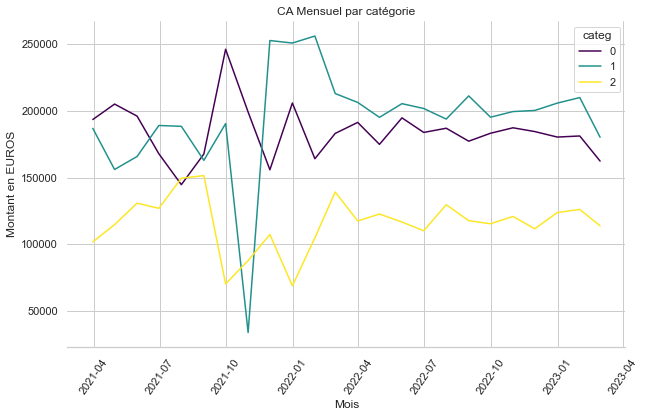

In [70]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcabcm = sns.lineplot(data=dfcabcm, x="date", y ="montant_en_euros", hue="categ",palette="viridis" )
graphcabcm.set(xlabel='Mois', ylabel='Montant en EUROS', title='CA Mensuel par catégorie')
sns.despine(top= True, right= True, left= True)
plt.xticks(rotation=55)
#graphique du ca par categ par mois

In [71]:
dfcabcq=dffinal.groupby(['categ', pd.Grouper(key='date', freq='q')])['montant_en_euros'].sum()
dfcabcq = dfcabcq.reset_index()
print(dfcabcq)
#ca par categ par trimestre

    categ       date  montant_en_euros
0       0 2021-03-31         193629.17
1       0 2021-06-30         569352.33
2       0 2021-09-30         558842.32
3       0 2021-12-31         561196.63
4       0 2022-03-31         538872.78
5       0 2022-06-30         553804.46
6       0 2022-09-30         547799.00
7       0 2022-12-31         552494.22
8       0 2023-03-31         343740.06
9       1 2021-03-31         186974.17
10      1 2021-06-30         511193.79
11      1 2021-09-30         542128.43
12      1 2021-12-31         537699.46
13      1 2022-03-31         675873.82
14      1 2022-06-30         602708.66
15      1 2022-09-30         600709.35
16      1 2022-12-31         605983.36
17      1 2023-03-31         390451.65
18      2 2021-03-31         101837.27
19      2 2021-06-30         372595.21
20      2 2021-09-30         371390.12
21      2 2021-12-31         263987.66
22      2 2022-03-31         361620.42
23      2 2022-06-30         349634.54
24      2 2022-09-30     

(array([18718., 18809., 18901., 18993., 19083., 19174., 19266., 19358.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

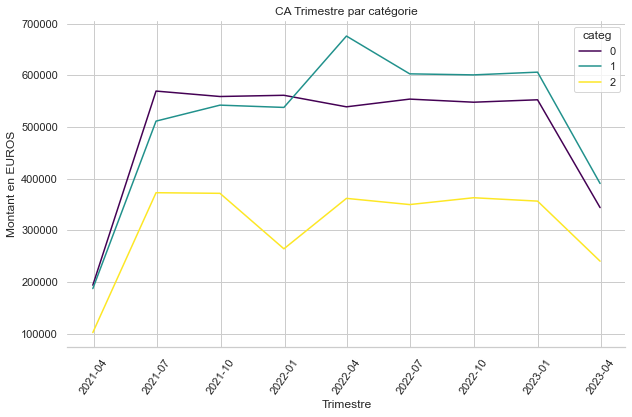

In [72]:
plt.figure(figsize=(10,6))
graphcabcq = sns.lineplot(data=dfcabcq, x="date", y ="montant_en_euros", hue="categ",palette="viridis")
graphcabcq.set(xlabel='Trimestre', ylabel='Montant en EUROS', title='CA Trimestre par catégorie')
sns.despine(top= True, right= True, left=True)
graphcabcq.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
#graphique du ca par categ trimestre

In [73]:
dfcabcy=dffinal.groupby(['categ', pd.Grouper(key='date', freq='y')])['montant_en_euros'].sum().round()
dfcabcy = dfcabcy.reset_index()
print(dfcabcy)
#ca par categ par an

   categ       date  montant_en_euros
0      0 2021-12-31         1883020.0
1      0 2022-12-31         2192970.0
2      0 2023-12-31          343740.0
3      1 2021-12-31         1777996.0
4      1 2022-12-31         2485275.0
5      1 2023-12-31          390452.0
6      2 2021-12-31         1109810.0
7      2 2022-12-31         1430436.0
8      2 2023-12-31          240029.0


(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

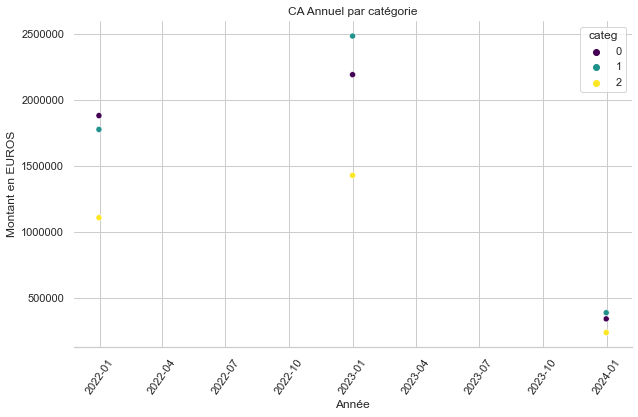

In [74]:
plt.figure(figsize=(10,6))
graphcabcy = sns.scatterplot(data=dfcabcy, x="date", y ="montant_en_euros", hue="categ",palette="viridis")
graphcabcy.set(xlabel='Année', ylabel='Montant en EUROS', title='CA Annuel par catégorie')
sns.despine(top= True, right= True, left=True)
graphcabcy.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
#graphique du ca par categ annuel

In [75]:
dfcatotcat=dffinal.groupby('categ')['montant_en_euros'].sum().round()
dfcatotcat = dfcatotcat.reset_index()
print(dfcatotcat)
#CA par catégories depuis le début du site

   categ  montant_en_euros
0      0         4419960.0
1      1         4653794.0
2      2         2780770.0


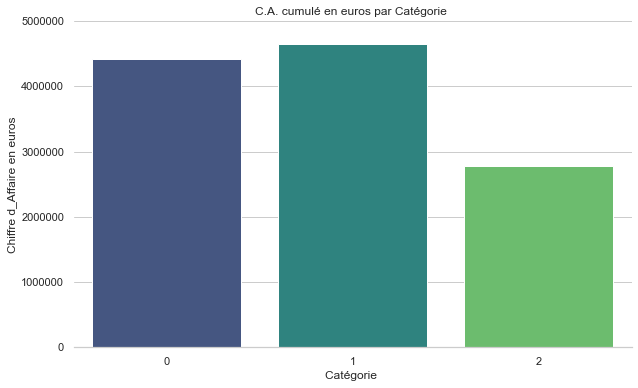

In [76]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcatotcat= sns.barplot(x='categ', y='montant_en_euros', data= dfcatotcat,palette = 'viridis')
graphcatotcat.set(xlabel='Catégorie ', ylabel='Chiffre d_Affaire en euros', title='C.A. cumulé en euros par Catégorie ')
sns.despine(top= True, right= True, left= True)
graphcatotcat.set(ylim=(0,5000000))
graphcatotcat.ticklabel_format(style='plain', axis='y')
#representation graphique du CA par categorie depuis le début du site 

<a id='section4'></a>
# <big><font face="'Montserrat'" color="#3b528b">ANALYSES PRODUITS</font></big>

In [77]:
dftop15 = dffinal.value_counts(subset=['id_prod'])
dftop15 = dftop15.reset_index()
dftop15.head (15)
#top 15 en volume en references

,id_prod,0
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
5,1_403,1960
6,1_412,1951
7,1_413,1945
8,1_406,1939
9,1_407,1935


In [78]:
top15 = dffinal.groupby('id_prod')['montant_en_euros'].sum().round()
top15 = top15.reset_index()
top15.nlargest(15, 'montant_en_euros')
#top15 en valeur vs reference au global

,id_prod,montant_en_euros
3114,2_159,94894.0
3088,2_135,69335.0
3063,2_112,65408.0
3052,2_102,60737.0
3170,2_209,56972.0
2637,1_395,54356.0
2608,1_369,54025.0
3061,2_110,53846.0
3219,2_39,53061.0
3122,2_166,52449.0


In [79]:
topflop50val = top15.nsmallest(50, 'montant_en_euros')
topflop50val.head(50)
#flop50 en valeur 
#prendre decision vs le cout de stockage ou d'envoi etc 

,id_prod,montant_en_euros
19,0_1014,1.0
318,0_1284,1.0
601,0_1539,1.0
692,0_1620,1.0
555,0_1498,2.0
671,0_1601,2.0
728,0_1653,2.0
811,0_1728,2.0
869,0_1780,2.0
1544,0_310,2.0


In [80]:
avcart = dffinal.groupby('categ')['montant_en_euros'].mean().round(2)
avcart = avcart.reset_index()
avcart.head ()
#valeur moyenne de la categorie

,categ,montant_en_euros
0,0,10.64
1,1,20.49
2,2,76.21


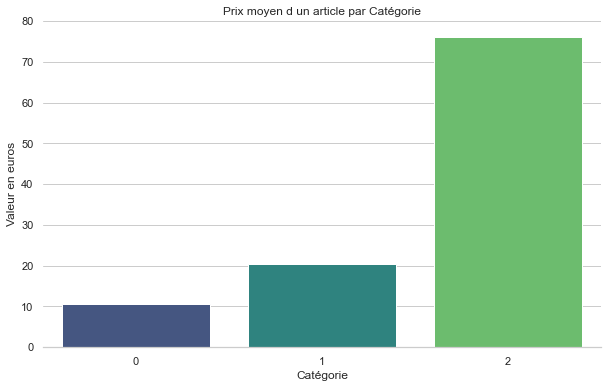

In [81]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphavcart= sns.barplot(x='categ', y='montant_en_euros', data= avcart, palette = 'viridis')
graphavcart.set(xlabel='Catégorie', ylabel='Valeur en euros', title='Prix moyen d un article par Catégorie')
sns.despine(top= True, right= True, left= True)
#representation graphique de la valeur moyenne de la categorie

# <big><font face="'Montserrat'" color="#440154">COURBE DE LORENZ PRODUITS</font></big>

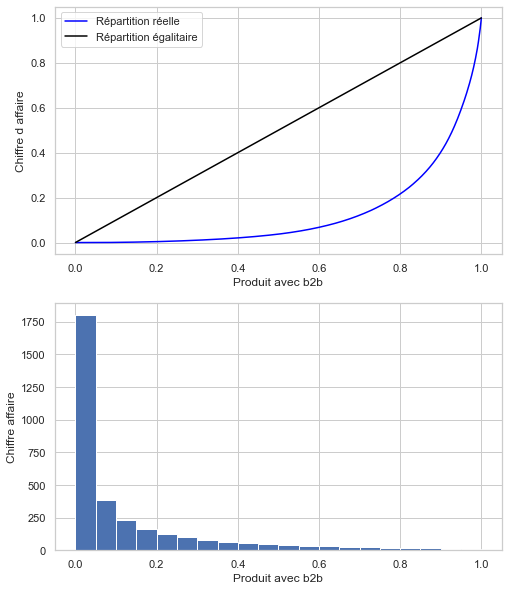

In [82]:
dftop15= top15.sort_values(by=['montant_en_euros'])
dftop15['Ct']=np.arange(1,len(dftop15)+1)
x = dftop15['Ct']
y = dftop15['montant_en_euros'].cumsum()
ig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))
#x,Normaliser avec la valeur maximale de y et dessiner avec une ligne bleue
ax1.plot(x/max(x),y/max(y),'blue', label='Répartition réelle')
#En tant que distribution uniforme, y=Dessin graphique de x
ax1.plot(x/max(x),x/max(x),'black', label = 'Répartition égalitaire')
#Dessinez la distribution de fréquence sur ax2 (Puisque la note est de 20 niveaux,=20）
ax2.hist(y/max(y), bins = 20, range =(0,1),label ='produits')
ax1.set_xlabel('Produit avec b2b')
ax1.set_ylabel('Chiffre d affaire')
ax2.set_ylabel('Chiffre affaire')
ax2.set_xlabel('Produit avec b2b')
ax1.legend()
ax1.grid(True)
plt.show()
#avec le b2b 

<a id='section5'></a>
# <big><font face="'Montserrat'" color="#3b528b">ANALYSES CLIENTS</font></big>

In [83]:
dfcatotcasex=dffinal.groupby('sex', )['montant_en_euros'].sum().round()
dfcatotcasex = dfcatotcasex.reset_index()
print(dfcatotcasex)
#ca total par sexe

  sex  montant_en_euros
0   f         5859683.0
1   m         5994046.0


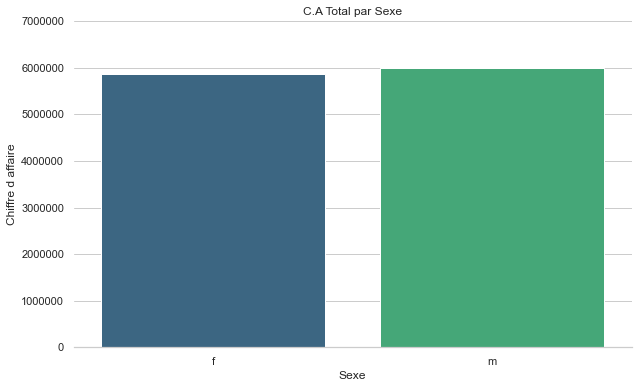

In [84]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcatotcasex= sns.barplot(x= 'sex', y='montant_en_euros', data= dfcatotcasex, palette = 'viridis')
graphcatotcasex.set(xlabel='Sexe', ylabel='Chiffre d affaire', title='C.A Total par Sexe')
graphcatotcasex.ticklabel_format(style='plain', axis='y')
graphcatotcasex.set(ylim=(0,7000000))
sns.despine(top= True, right= True, left=True)
#representation graphique du CA total par sexe

# <big><font face="'Montserrat'" color="#440154">COURBES DE LORENZ CLIENTS</font></big> 

In [85]:
cartclient = dffinal.groupby('client_id')['montant_en_euros'].sum()
cartclient = cartclient.reset_index()
cartclient.head()
#panier par client 

,client_id,montant_en_euros
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


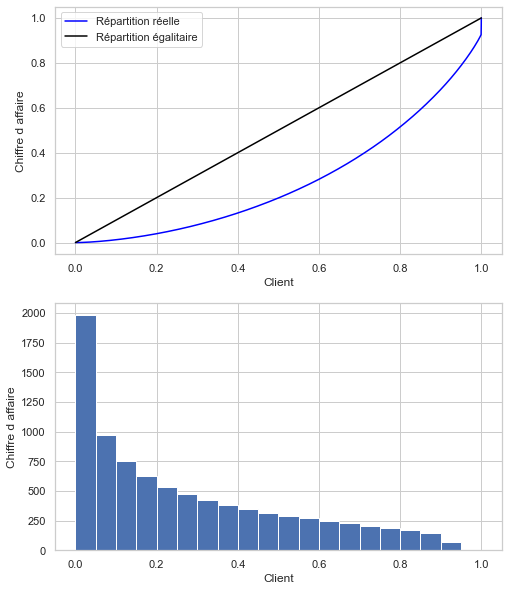

In [86]:
dfcartclient= cartclient.sort_values(by=['montant_en_euros'])
dfcartclient['Ct']=np.arange(1,len(dfcartclient)+1)
x = dfcartclient['Ct']
y = dfcartclient['montant_en_euros'].cumsum()
ig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))

ax1.plot(x/max(x),y/max(y),'blue', label='Répartition réelle')
ax1.plot(x/max(x),x/max(x),'black', label = 'Répartition égalitaire')

ax2.hist(y/max(y), bins = 20, range =(0,1),label ='Client')

ax1.set_xlabel('Client')
ax1.set_ylabel('Chiffre d affaire')
ax2.set_ylabel('Chiffre d affaire')
ax2.set_xlabel('Client')
ax1.legend()
ax1.grid(True)
plt.show()
#avec b2b 

In [87]:
cartclient.nlargest(15,'montant_en_euros' )
#les  15 plus gros clients  on voit 4 clients qui se détachent qui sont des clients qu'on peut qualifier de professionnels

,client_id,montant_en_euros
678,c_1609,324033.35
4398,c_4958,289760.34
6350,c_6714,153598.92
2728,c_3454,113637.93
2516,c_3263,5276.87
635,c_1570,5271.62
2110,c_2899,5214.05
1269,c_2140,5208.82
7022,c_7319,5155.77
7732,c_7959,5085.45


<a id='section6'></a>
# <big><font face="'Montserrat'" color="#3b528b">ANALYSES VOLUMES</font></big>

In [88]:
dfcateg= dffinal['categ'].value_counts(ascending=False)
dfcateg = dfcateg.reset_index()
dfcateg.head()
#nombre de vente en volume par categorie

,index,categ
0,0,415475
1,1,227171
2,2,36486


In [89]:
dfcateg2 = (dffinal['categ'].value_counts()/dffinal['categ'].count())*100
print(dfcateg2)
#nombre de vente en pourcentage par categorie

0    61.177356
1    33.450198
2     5.372446
Name: categ, dtype: float64


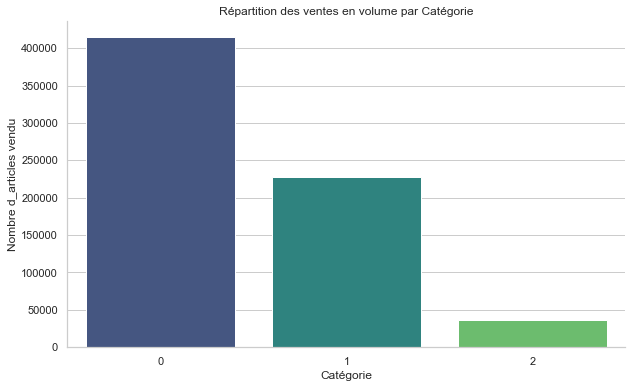

In [90]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcateg= sns.barplot(x= 'index', y='categ', data= dfcateg, palette = 'viridis')
graphcateg.set(xlabel='Catégorie', ylabel='Nombre d_articles vendu', title='Répartition des ventes en volume par Catégorie')
sns.despine(top= True, right= True)
#representation graphique du nombre de vente en volume par categorie

In [91]:
dfcategsex= dffinal.groupby('sex')['categ'].value_counts().reset_index(name="nombre")
dfcategsex.head(6)
#ventes en volume par categorie et par sexe 

,sex,categ,nombre
0,f,0,206103
1,f,1,114899
2,f,2,17283
3,m,0,209356
4,m,1,112270
5,m,2,19200


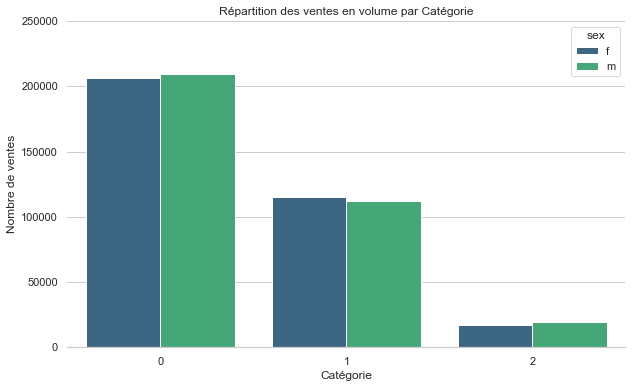

In [92]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcateg= sns.barplot(x= 'categ', y='nombre', hue="sex", data= dfcategsex, palette = 'viridis')
graphcateg.set(xlabel='Catégorie', ylabel='Nombre de ventes', title='Répartition des ventes en volume par Catégorie')
graphcateg.set(ylim=(0,250000))
sns.despine(top= True, right= True, left= True)
# representation graphique des ventes en volume par categorie par sexe 

In [93]:
dfcategage= dffinal.groupby('age')['categ'].value_counts().unstack()
print(dfcategage)
#ventes en volume par age et par catégorie

categ     0     1     2
age                    
17.0   3418  5719  6012
18.0    909  1678  1784
19.0   1016  1723  1845
20.0    974  1550  1728
21.0   1114  1628  1671
...     ...   ...   ...
88.0    142   183     1
89.0    132   177     2
90.0     77    91     2
91.0     75   149     2
92.0     78   122     1

[76 rows x 3 columns]


<a id='section7'></a>
# <big><font face="'Montserrat'" color="#3b528b">ANALYSES DES PANIERS MOYENS</font></big>

In [94]:
avcartclient = dffinal.groupby('client_id')['montant_en_euros'].mean()
avcartclient = avcartclient.reset_index()
print(avcartclient)
#panier moyen par client

     client_id  montant_en_euros
0          c_1         14.312308
1         c_10         23.337931
2        c_100         31.856250
3       c_1000         18.095120
4       c_1001         17.773137
...        ...               ...
8618     c_997         25.254407
8619     c_998         52.450566
8620     c_999         15.247826
8621      ct_0               NaN
8622      ct_1               NaN

[8623 rows x 2 columns]


In [95]:
avcartclient.nlargest(25,'montant_en_euros')
#liste des clients avec les plus gros panier moyen

,client_id,montant_en_euros
3769,c_4391,181.990000
3935,c_4540,181.990000
1522,c_2369,148.241429
965,c_1868,129.695714
7278,c_755,124.612500
4887,c_5398,123.497500
7713,c_7941,120.580000
4535,c_5080,118.490000
4213,c_4791,117.455625
3622,c_4259,109.068182


In [96]:
avcartsex = dffinal.groupby('sex')['montant_en_euros'].mean().round(2)
avcartsex = avcartsex.reset_index()
print(avcartsex)
#panier moyen par sexe

  sex  montant_en_euros
0   f             17.32
1   m             17.59


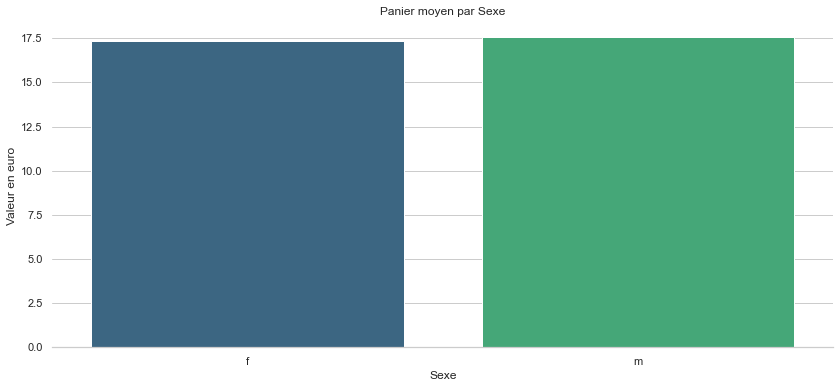

In [97]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphavcartsex = sns.barplot(x= 'sex', y='montant_en_euros', data= avcartsex , palette = 'viridis')
graphavcartsex .set(xlabel='Sexe', ylabel='Valeur en euro ', title='Panier moyen par Sexe')
sns.despine(top= True, right= True,  left=True)
#representation graphique du panier moyen par sexe 

In [98]:
avcartage = dffinal.groupby('age')['montant_en_euros'].mean().round(2)
avcartage = avcartage.reset_index()
print(avcartage)
#panier moyen par age

     age  montant_en_euros
0   17.0             40.20
1   18.0             40.77
2   19.0             40.18
3   20.0             41.98
4   21.0             37.39
..   ...               ...
71  88.0             16.12
72  89.0             16.22
73  90.0             16.56
74  91.0             17.76
75  92.0             16.03

[76 rows x 2 columns]


[(0.0, 50.0)]

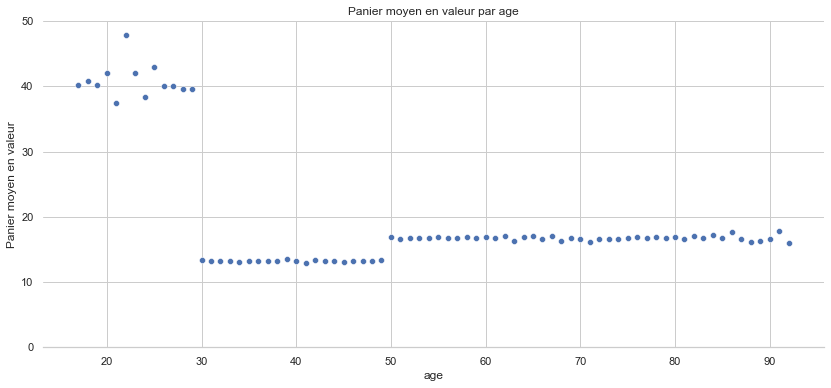

In [99]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphavcartage = sns.scatterplot(data=avcartage, x="age", y ="montant_en_euros",palette="viridis")
graphavcartage.set(xlabel='age', ylabel='Panier moyen en valeur', title='Panier moyen en valeur par age')
sns.despine(top= True, right= True, left = True)
graphavcartage.set(ylim=(0,50))
#graphique en nuage de point sur la relation entre l'age et le panier moyen

In [100]:
avcartage.nlargest(10,'montant_en_euros')
#liste des plus gros panier moyen par age

,age,montant_en_euros
5,22.0,47.80
8,25.0,43.04
6,23.0,42.05
3,20.0,41.98
1,18.0,40.77
0,17.0,40.20
2,19.0,40.18
9,26.0,40.11
10,27.0,39.99
11,28.0,39.57


<a id='section8'></a>
# <big><font face="'Montserrat'" color="#440154">RESULTAT SANS B2B</font></big> 

In [101]:
dffinalsb2b= dffinal[~dffinal['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])]
dffinalsb2b.head()

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee,mois,semaine,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,both,4.18,0,both,2022-05-20,2022.0,5.0,20,35.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,both,4.18,0,both,2021-07-20,2021.0,7.0,29,35.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,both,4.18,0,both,2022-08-20,2022.0,8.0,33,35.0
12,0_1518,2022-05-27 12:41:28.779302,s_214775,c_7456,f,1985.0,both,4.18,0,both,2022-05-27,2022.0,5.0,21,36.0
13,0_1518,2021-11-27 12:41:28.779302,s_125853,c_7456,f,1985.0,both,4.18,0,both,2021-11-27,2021.0,11.0,47,36.0


# <big><font face="'Montserrat'" color="#440154">COURBES DE LORENZ CLIENTS SANS B2B</font></big> 

In [102]:
cartclient2 = dffinalsb2b.groupby('client_id')['montant_en_euros'].sum()
cartclient2 = cartclient2.reset_index()
cartclient2.head()

,client_id,montant_en_euros
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


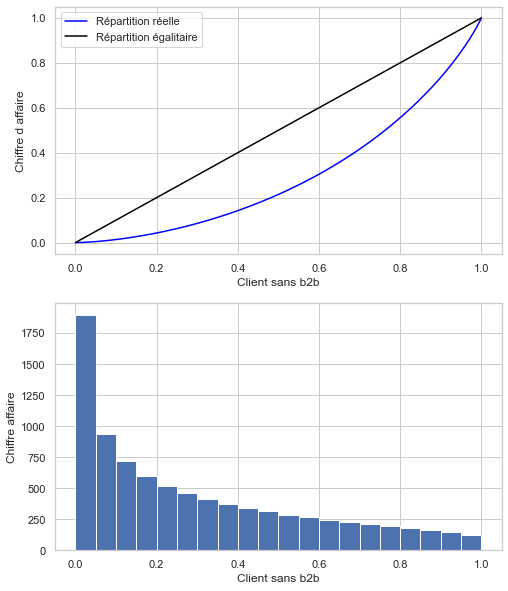

In [103]:
dfcartclient2= cartclient2.sort_values(by=['montant_en_euros'])
dfcartclient2['Ct']=np.arange(1,len(dfcartclient2)+1)
x = dfcartclient2['Ct']
y = dfcartclient2['montant_en_euros'].cumsum()
ig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))
#x,Normaliser avec la valeur maximale de y et dessiner avec une ligne bleue
ax1.plot(x/max(x),y/max(y),'blue', label='Répartition réelle')
#En tant que distribution uniforme, y=Dessin graphique de x
ax1.plot(x/max(x),x/max(x),'black', label = 'Répartition égalitaire')
#Dessinez la distribution de fréquence sur ax2 (Puisque la note est de 20 niveaux,=20）
ax2.hist(y/max(y), bins = 20, range =(0,1),label ='Client')
ax1.set_xlabel('Client sans b2b')
ax1.set_ylabel('Chiffre d affaire')
ax2.set_ylabel('Chiffre affaire')
ax2.set_xlabel('Client sans b2b')
ax1.legend()
ax1.grid(True)
plt.show()
#sans b2b

In [104]:
caannuel2=dffinalsb2b.groupby('annee' )['montant_en_euros'].sum().round()
caannuel2 = caannuel2.reset_index()
print(caannuel2)
#calcul du ca annuel et en cours sans b2b

    annee  montant_en_euros
0  2021.0         4414307.0
1  2022.0         5655421.0
2  2023.0          902970.0


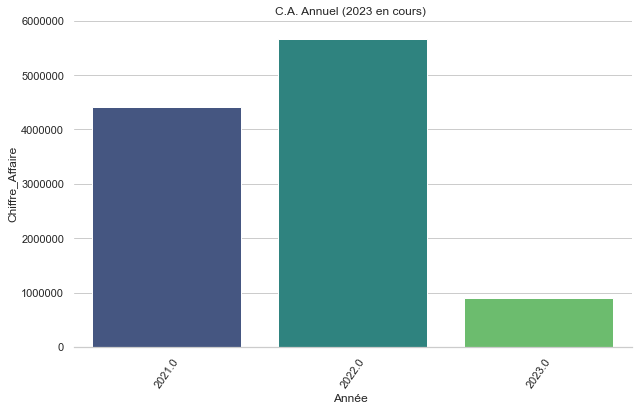

In [105]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphcaannuel= sns.barplot(x= 'annee', y='montant_en_euros', data= caannuel2,palette = 'viridis')
graphcaannuel.set(xlabel='Année ', ylabel='Chiffre_Affaire', title='C.A. Annuel (2023 en cours) ')
sns.despine(top= True, right= True, left= True)
graphcaannuel.set(ylim=(0,6000000))
plt.xticks(rotation=55)
graphcaannuel.ticklabel_format(style='plain', axis='y')
#graphique du ca annuel et en cours sans b2b

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

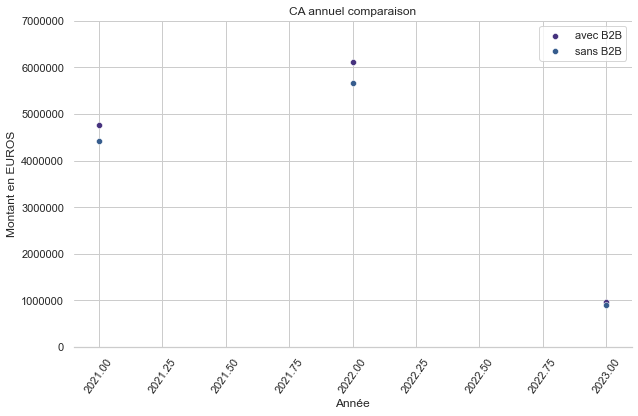

In [106]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set_palette("viridis")
graphcatot= sns.scatterplot(data=caannuel, x="annee", y ="montant_en_euros")
graphcatot= sns.scatterplot(data=caannuel2, x="annee", y="montant_en_euros")
graphcatot.set(xlabel='Année', ylabel='Montant en EUROS', title='CA annuel comparaison')
sns.despine(top= True, right= True, left= True)
plt.legend(labels=["avec B2B","sans B2B"])
graphcatot.set(ylim=(0,7000000))
graphcatot.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=55)
# comparaison du ca global avec le b2b vs sans 

# <big><font face="'Montserrat'" color="#21918c">SAISONNALITE</font></big>

In [107]:
dftestdate = dffinalsb2b[(dffinalsb2b['date'] > '2021-1-1') & (dffinalsb2b['date'] <= '2021-06-30')]
dftestdate .head(50)

,id_prod,date,session_id,client_id,sex,birth,merge1,montant_en_euros,categ,merge2,format,annee,mois,semaine,age
17,0_1518,2021-05-30 23:27:42.563096,s_41860,c_2145,m,1985.0,both,4.18,0,both,2021-05-30,2021.0,5.0,21,36.0
58,0_1518,2021-06-22 17:01:41.202511,s_52301,c_7098,f,1976.0,both,4.18,0,both,2021-06-22,2021.0,6.0,25,45.0
59,0_1518,2021-05-21 12:16:10.835044,s_37526,c_1850,f,1983.0,both,4.18,0,both,2021-05-21,2021.0,5.0,20,38.0
78,0_1518,2021-06-16 11:20:47.528116,s_49443,c_4773,m,1975.0,both,4.18,0,both,2021-06-16,2021.0,6.0,24,46.0
87,0_1518,2021-03-14 21:41:01.681414,s_6388,c_8432,f,1952.0,both,4.18,0,both,2021-03-14,2021.0,3.0,10,69.0
93,0_1518,2021-04-11 17:39:30.457686,s_19186,c_3093,f,1990.0,both,4.18,0,both,2021-04-11,2021.0,4.0,14,31.0
94,0_1518,2021-06-10 10:38:40.164905,s_46684,c_5647,f,1957.0,both,4.18,0,both,2021-06-10,2021.0,6.0,23,64.0
99,0_1518,2021-06-23 16:39:58.417050,s_52743,c_846,f,1981.0,both,4.18,0,both,2021-06-23,2021.0,6.0,25,40.0
103,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,f,1974.0,both,4.18,0,both,2021-05-06,2021.0,5.0,18,47.0
114,0_1518,2021-05-19 22:40:33.353960,s_36815,c_2464,m,1974.0,both,4.18,0,both,2021-05-19,2021.0,5.0,20,47.0


In [108]:
cajour= dftestdate.resample('d', on='date').agg({'montant_en_euros':'sum'}).reset_index().round()
cajour.head(50)

,date,montant_en_euros
0,2021-03-01,15469.0
1,2021-03-02,14558.0
2,2021-03-03,13900.0
3,2021-03-04,13568.0
4,2021-03-05,16216.0
5,2021-03-06,14500.0
6,2021-03-07,14033.0
7,2021-03-08,14487.0
8,2021-03-09,14391.0
9,2021-03-10,14581.0


(array([18687., 18701., 18718., 18732., 18748., 18762., 18779., 18793.,
        18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

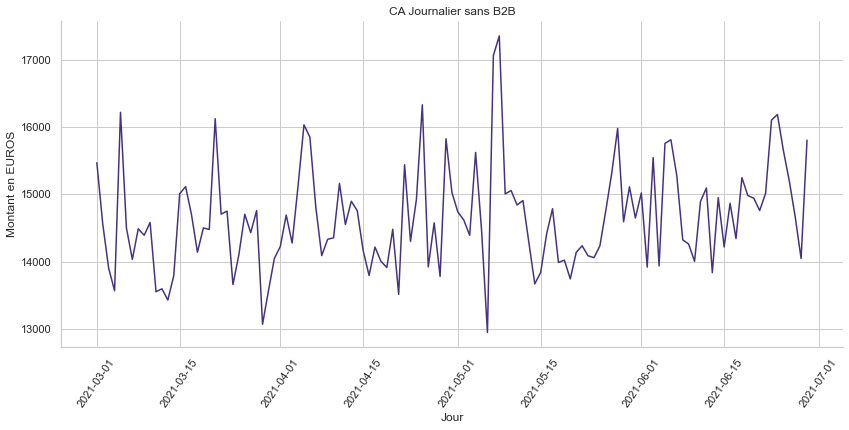

In [109]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
gtt =sns.lineplot(x='date', y = 'montant_en_euros', data= cajour, palette='viridis')
gtt.set(xlabel='Jour', ylabel='Montant en EUROS', title='CA Journalier sans B2B')
sns.despine(top= True, right= True)
plt.xticks(rotation=55)

In [110]:
cajour['CA_moyen_jour']= cajour['montant_en_euros'].rolling(10).mean()
cajour.head(30)
#lissage CA jour

,date,montant_en_euros,CA_moyen_jour
0,2021-03-01,15469.0,NaN
1,2021-03-02,14558.0,NaN
2,2021-03-03,13900.0,NaN
3,2021-03-04,13568.0,NaN
4,2021-03-05,16216.0,NaN
5,2021-03-06,14500.0,NaN
6,2021-03-07,14033.0,NaN
7,2021-03-08,14487.0,NaN
8,2021-03-09,14391.0,NaN
9,2021-03-10,14581.0,14570.3


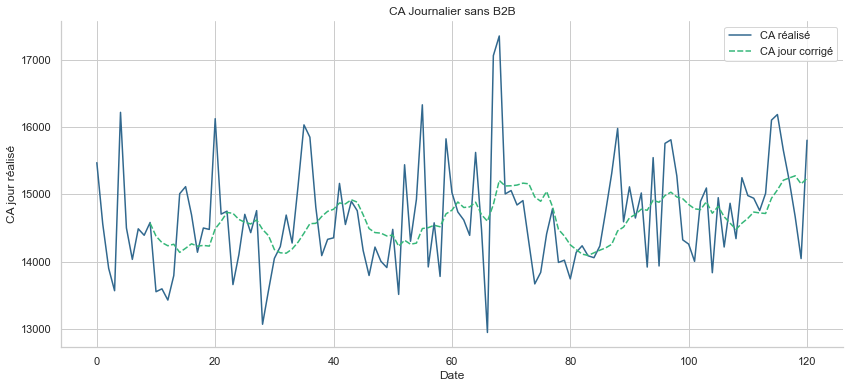

In [111]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphcajour= sns.lineplot(data=cajour,palette= 'viridis')
graphcajour.set(xlabel='Date', ylabel='CA jour réalisé', title = 'CA Journalier sans B2B')
plt.legend(loc='upper right', labels=['CA réalisé', 'CA jour corrigé'])
sns.despine(top= True, right= True)

<Figure size 432x288 with 0 Axes>

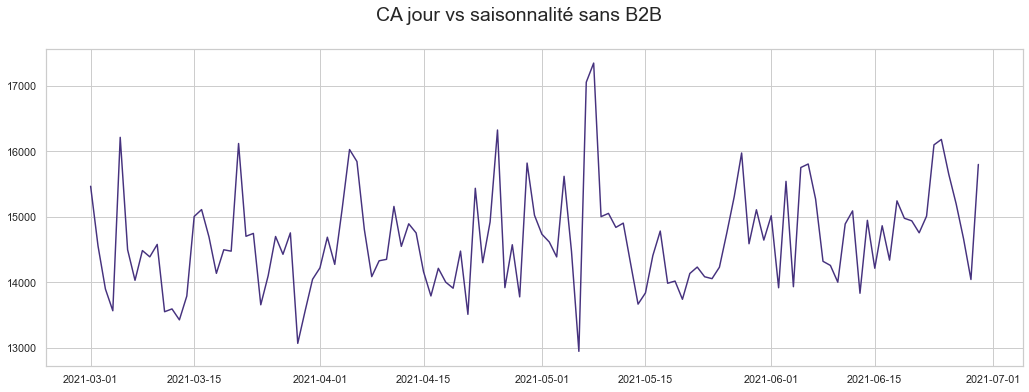

<Figure size 432x288 with 0 Axes>

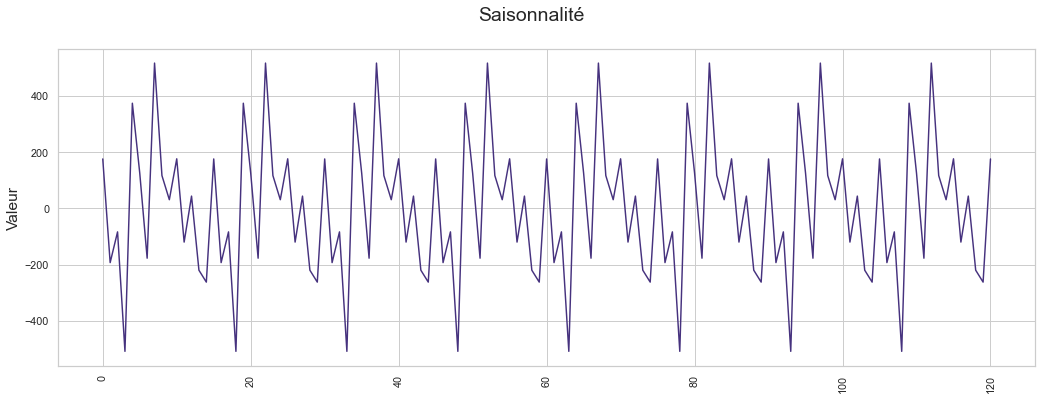

<Figure size 432x288 with 0 Axes>

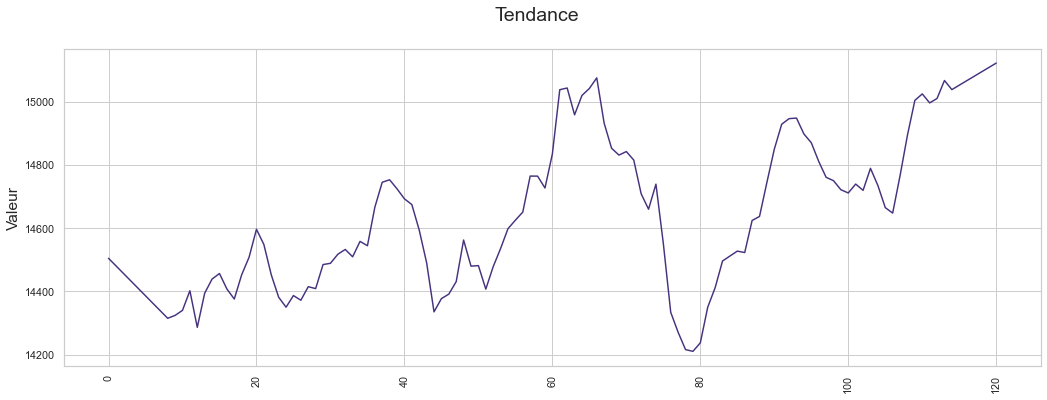

<Figure size 432x288 with 0 Axes>

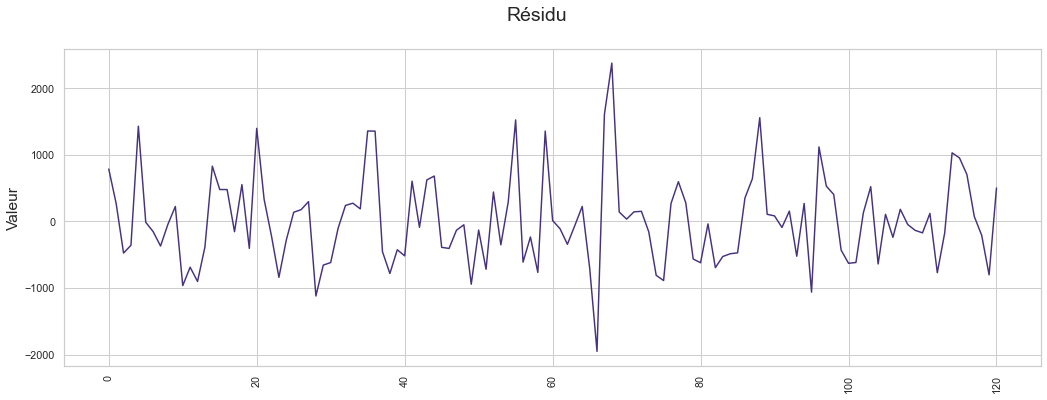

In [112]:
test_saison = cajour
s= sm.tsa.seasonal_decompose(cajour.montant_en_euros, period=15, extrapolate_trend=1)

fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("CA jour vs saisonnalité sans B2B", fontsize=20)
plt.style.context('fivethirtyeight')
plt.plot(cajour.date, cajour.montant_en_euros)

fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("Saisonnalité", fontsize=20)
plt.plot(s.seasonal)
plt.xticks(rotation=90)

plt.ylabel("Valeur", fontsize=16)

plt.show()


fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("Tendance", fontsize=20)
plt.plot(s.trend)
plt.xticks(rotation=90)

plt.ylabel("Valeur", fontsize=16)
plt.show()


fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("Résidu", fontsize=20)
plt.plot(s.resid)
plt.xticks(rotation=90)

plt.ylabel("Valeur", fontsize=16)
plt.show()




<a id='section9'></a>
# <big><font face="'Montserrat'" color="#440154">ANALYSE CA PAR AGE</font></big> 

In [113]:
dfagecat = dffinalsb2b.groupby(['age'])['montant_en_euros'].sum().round()
dfagecat = dfagecat.reset_index()
dfagecatop10= dfagecat.nlargest(10,'montant_en_euros')
dfagecatop10.head(10)
#top 10 de C.A. vs année de naissance

,age,montant_en_euros
0,17.0,609014.0
25,42.0,334268.0
16,33.0,330761.0
26,43.0,324491.0
18,35.0,309125.0
24,41.0,289581.0
21,38.0,281770.0
22,39.0,277318.0
20,37.0,270692.0
27,44.0,263061.0


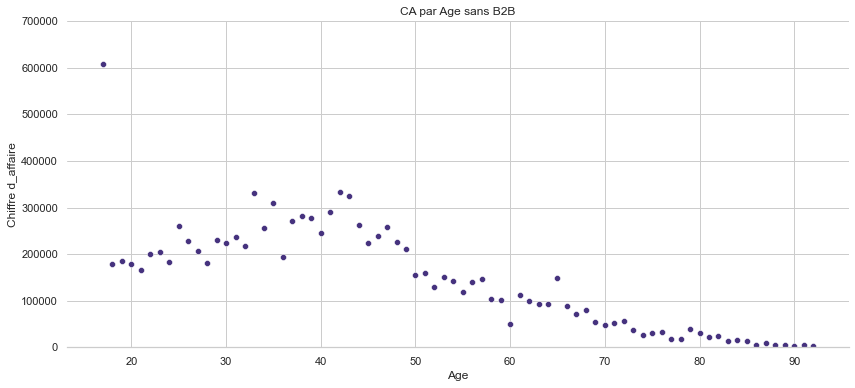

In [114]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphagecat = sns.scatterplot(data=dfagecat, x="age", y ="montant_en_euros", palette="viridis")
graphagecat.set(xlabel='Age', ylabel='Chiffre d_affaire', title='CA par Age sans B2B')
graphagecat.set(ylim=(0,700000))
sns.despine(top= True, right= True,left = True)
#graph en nuage de point mettant en relation l'age et le montant depensé

<a id='section10'></a>
# <big><font face="'Montserrat'" color="#440154">LIAISON ENTRE LE SEXE ET LA CATEGORIE ACHETEE</font></big> 

In [115]:
sexcatclient= dffinalsb2b.groupby(['client_id','sex','categ']).count().reset_index()
sexcatclient.head(50)


,client_id,sex,categ,id_prod,date,session_id,birth,merge1,montant_en_euros,merge2,format,annee,mois,semaine,age
0,c_1,m,0,30,30,30,30,30,30,30,30,30,30,30,30
1,c_1,m,1,8,8,8,8,8,8,8,8,8,8,8,8
2,c_1,m,2,1,1,1,1,1,1,1,1,1,1,1,1
3,c_10,m,0,20,20,20,20,20,20,20,20,20,20,20,20
4,c_10,m,1,34,34,34,34,34,34,34,34,34,34,34,34
5,c_10,m,2,4,4,4,4,4,4,4,4,4,4,4,4
6,c_100,m,0,2,2,2,2,2,2,2,2,2,2,2,2
7,c_100,m,1,5,5,5,5,5,5,5,5,5,5,5,5
8,c_100,m,2,1,1,1,1,1,1,1,1,1,1,1,1
9,c_1000,f,0,43,43,43,43,43,43,43,43,43,43,43,43


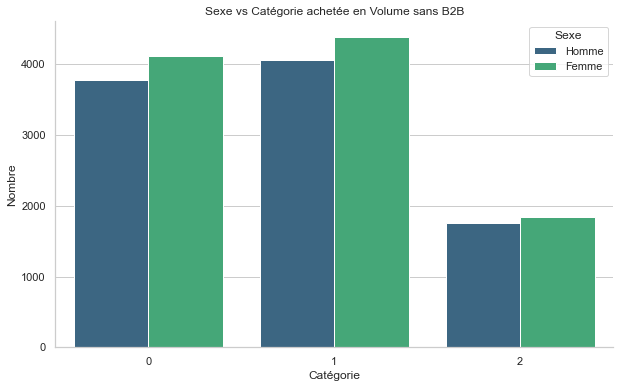

In [116]:
plt.figure(figsize=(10,6))
sns.set_palette("viridis")
sns.set_style("whitegrid")
gsc =sns.countplot (x='categ', hue='sex',data=sexcatclient, palette= 'viridis')
gsc.set(xlabel='Catégorie',ylabel='Nombre', title='Sexe vs Catégorie achetée en Volume sans B2B')
sns.despine(top= True, right= True)
plt.legend(title='Sexe', loc='upper right', labels=['Homme', 'Femme'])

# pas de difference significative sur l'achat d'une catégorie vs le sexe au premier abord

In [117]:
X = "sex"
Y = "categ"

cont = sexcatclient[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,4119,4391,1839,10349
m,3773,4058,1754,9585
Total,7892,8449,3593,19934


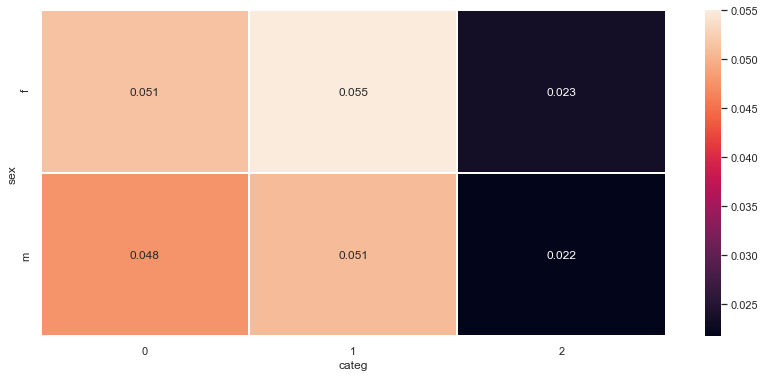

In [118]:
plt.figure(figsize=(14,6))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(sexcatclient)
indep = tx.dot(ty) / n


measure = (indep)**2/indep
measure = (indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,linewidths=.7)
plt.show()

In [119]:
X = "sex"
Y = "categ"

contingence = sexcatclient[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

contingence

categ,0,1,2
sex,,,
f,4119,4391,1839
m,3773,4058,1754


In [120]:
from scipy.stats import chi2_contingency
chi2_contingency(contingence)
#test de chi2

(1.024728095659948,
 0.5990776552222239,
 2,
 array([[4097.23627972, 4386.41020367, 1865.3535166 ],
        [3794.76372028, 4062.58979633, 1727.6464834 ]]))

h0 il y a un lien entre le sexe et la categorie achetée
ha il y a pas de lien entre le sexe et la categorie achetée
0.59>0.05 donc on accepte h0 et donc  par consequent il y a un lien entre le sexe et la categorie achetée

<a id='section11'></a>
# <big><font face="'Montserrat'" color="#440154">LIAISON ENTRE L AGE ET LE MONTANT TOTAL DES ACHATS</font></big>

In [121]:
ptac= dffinalsb2b.groupby(['client_id','age'])['montant_en_euros'].sum().reset_index()
ptac.head(5)
#panier totale par age par client

,client_id,age,montant_en_euros
0,c_1,66.0,558.18
1,c_10,65.0,1353.60
2,c_100,29.0,254.85
3,c_1000,55.0,2261.89
4,c_1001,39.0,1812.86


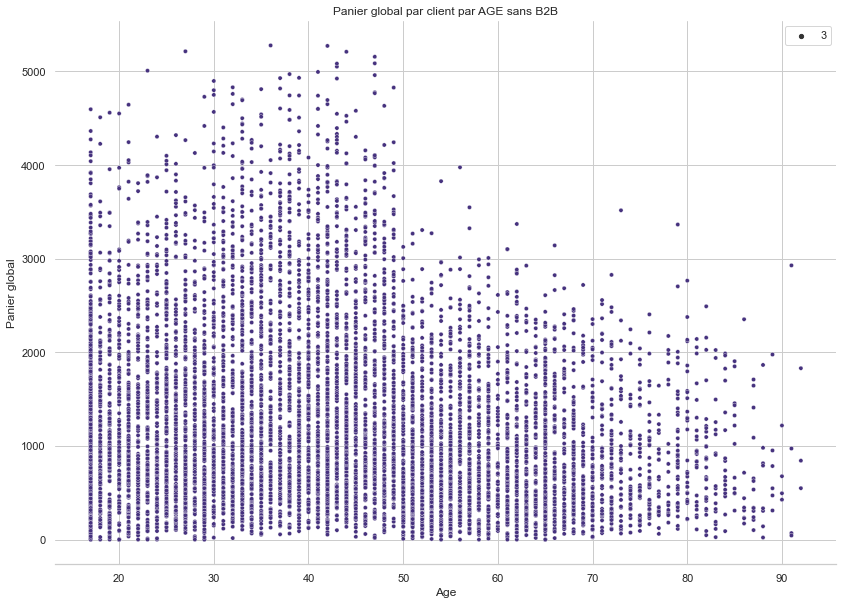

In [122]:
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
graphptac = sns.scatterplot(data=ptac, x="age", y ="montant_en_euros", palette="viridis",size=3)
graphptac.set(xlabel='Age', ylabel='Panier global', title='Panier global par client par AGE sans B2B')
sns.despine(top= True, right= True,left = True)
#graph en nuage du panier total par age sans b2b et par client

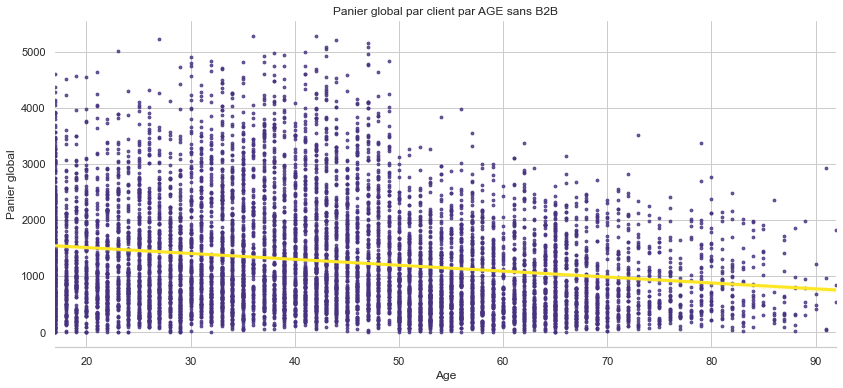

In [123]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
regl1 = sns.regplot(x="age", y="montant_en_euros", data=ptac, line_kws={'lw': 3, 'color': '#fde725'},scatter_kws={'s':8})
regl1.set(xlabel='Age', ylabel='Panier global', title='Panier global par client par AGE sans B2B')
sns.despine(top= True, right= True,left = True)

<a id='section12'></a>
# <big><font face="'Montserrat'" color="#440154">LIAISON ENTRE L AGE ET LA TAILLE DU PANIER MOYEN</font></big>

In [124]:
tpm= dffinalsb2b.groupby(['client_id','age','session_id']).count()['id_prod'].reset_index(name= 'nbre')
tpm.head(50)

,client_id,age,session_id,nbre
0,c_1,66.0,s_105105,1
1,c_1,66.0,s_114737,5
2,c_1,66.0,s_120172,2
3,c_1,66.0,s_134971,1
4,c_1,66.0,s_136532,1
5,c_1,66.0,s_139610,1
6,c_1,66.0,s_158128,1
7,c_1,66.0,s_172478,1
8,c_1,66.0,s_182481,1
9,c_1,66.0,s_190973,1


In [125]:
tpm2=tpm.groupby(['client_id','age'])['nbre'].mean().reset_index(name= 'nbre')
tpm2.head()

,client_id,age,nbre
0,c_1,66.0,1.181818
1,c_10,65.0,1.705882
2,c_100,29.0,1.600000
3,c_1000,55.0,1.344086
4,c_1001,39.0,2.170213


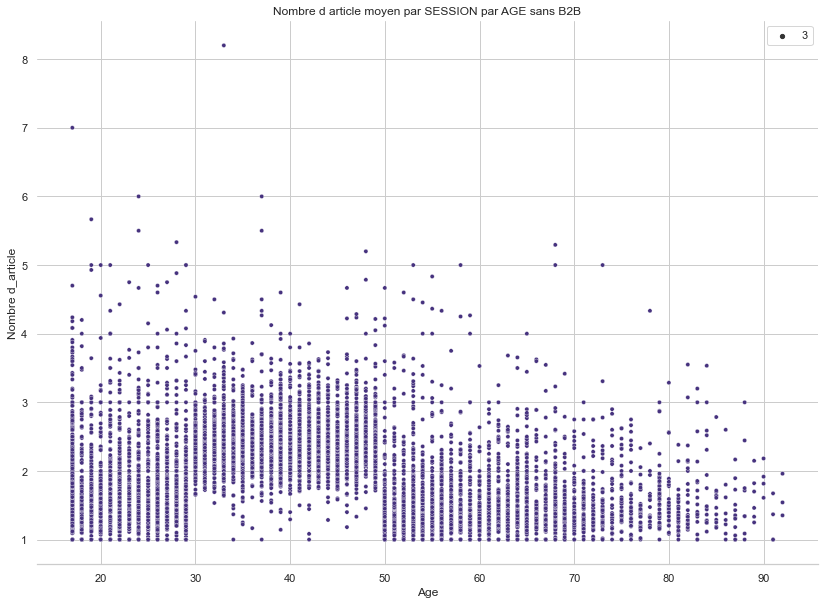

In [126]:
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
graphagetpm = sns.scatterplot(data=tpm2, x="age", y ="nbre", palette="viridis",size=3)
graphagetpm.set(xlabel='Age', ylabel='Nombre d_article', title='Nombre d article moyen par SESSION par AGE sans B2B')
sns.despine(top= True, right= True,left = True)
#graph en nuage du nombre d'article par session par age sans b2b

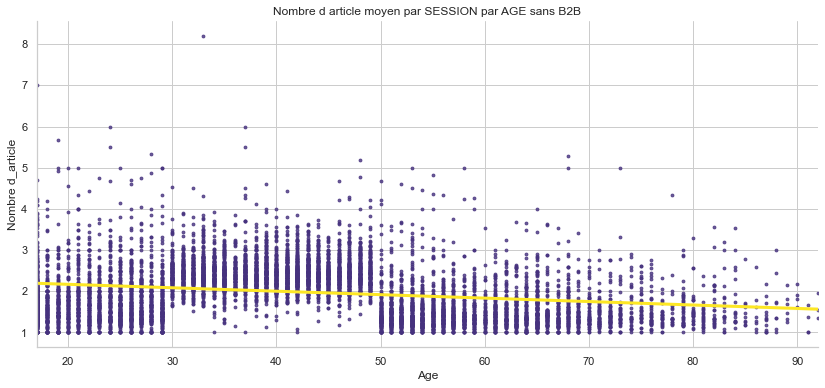

In [127]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
regl2 = sns.regplot(x="age", y="nbre", data=tpm2, line_kws={'lw': 3, 'color': '#fde725'},scatter_kws={'s':8})
regl2.set(xlabel='Age', ylabel='Nombre d_article', title='Nombre d article moyen par SESSION par AGE sans B2B')
sns.despine(top= True, right= True)
#graph en nuage du nombre d'article par session par age sans b2b avec regression lineare

<a id='section13'></a>
# <big><font face="'Montserrat'" color="#440154">LIAISON ENTRE L AGE ET LA CATEGORIE ACHETEE</font></big>

In [128]:
agecatclient= dffinalsb2b.groupby(['client_id','age', 'categ']).count().reset_index()
agecatclient.head(50)
#lien entre age des clients et la categorie acheté mais au client

,client_id,age,categ,id_prod,date,session_id,sex,birth,merge1,montant_en_euros,merge2,format,annee,mois,semaine
0,c_1,66.0,0,30,30,30,30,30,30,30,30,30,30,30,30
1,c_1,66.0,1,8,8,8,8,8,8,8,8,8,8,8,8
2,c_1,66.0,2,1,1,1,1,1,1,1,1,1,1,1,1
3,c_10,65.0,0,20,20,20,20,20,20,20,20,20,20,20,20
4,c_10,65.0,1,34,34,34,34,34,34,34,34,34,34,34,34
5,c_10,65.0,2,4,4,4,4,4,4,4,4,4,4,4,4
6,c_100,29.0,0,2,2,2,2,2,2,2,2,2,2,2,2
7,c_100,29.0,1,5,5,5,5,5,5,5,5,5,5,5,5
8,c_100,29.0,2,1,1,1,1,1,1,1,1,1,1,1,1
9,c_1000,55.0,0,43,43,43,43,43,43,43,43,43,43,43,43


[Text(0.5, 0, 'Catégorie'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 1.0, 'Lien entre la Catégorie achetée et l Age sans B2B')]

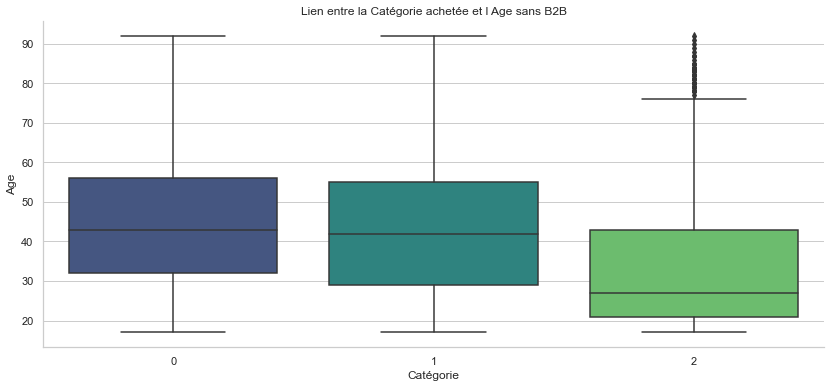

In [129]:
plt.figure(figsize=(14,6))
boxplotagecateg = sns.boxplot(x='categ', y = 'age', data= agecatclient, palette= 'viridis')
sns.despine(top= True, right= True)
boxplotagecateg.set(xlabel='Catégorie',ylabel='Age', title='Lien entre la Catégorie achetée et l Age sans B2B')
#anova

In [130]:
X = "categ" # qualitative
Y = "age" # quantitative

agecatclient

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(agecatclient[X],agecatclient[Y])

0.05454473468125901

In [131]:
#h0 il y a un lien entre l'age et les categories 
#ha il y a pas de lien entre l'age et les categories
#resultat : p value pvalue=0.05454473468125901 est superieur a 0.05 donc on accepte  h0 et rejette ha donc il y a un lien entre l'age et la categorie achetée

In [132]:
from statsmodels.formula.api import ols
model = ols('age~categ', data=agecatclient).fit()

anova_resultat = sm.stats.anova_lm(model, typ=2)
anova_resultat.head()

,sum_sq,df,F,PR(>F)
categ,2.433155e+05,1.0,871.028125,2.067783e-187
Residual,5.567863e+06,19932.0,NaN,NaN


In [133]:
#h0 Lien entre la Catégorie achetée et l Age
#ha pas de lien entre la Catégorie achetée et l Age
#resultat p value = 2.067783e-187 inf a 0.05  donc on rejete h0 et accepte ha donc pas de lien entre la Catégorie achetée et l Age

In [134]:
import scipy.stats as stat 

cat0 = agecatclient[agecatclient['categ'] == 0].age
cat1 = agecatclient[agecatclient['categ'] == 1].age
cat2 = agecatclient[agecatclient['categ'] == 2].age
stat.f_oneway(cat0,cat1,cat2)
#h0 Lien entre la Catégorie achetée et l Age
#ha pas de lien entre la Catégorie achetée et l Age
#resultat p value = pvalue=1.7792383221040405e-243​ inf a 0.05  donc on rejette h0 et accepte ha donc pas de lien entre la Catégorie achetée et l Age

F_onewayResult(statistic=574.9246668829222, pvalue=1.7792383221040405e-243)

In [135]:
test =cat0.reset_index()
test1 =cat1.reset_index()
test2 =cat2.reset_index()

<AxesSubplot:xlabel='age', ylabel='Count'>

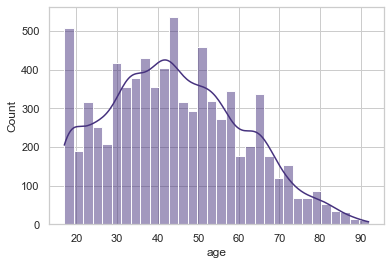

In [136]:
sns.histplot(data=test, x = 'age', kde=True) 
#SUIS PAS UNE LOI NORMAL

<AxesSubplot:xlabel='age', ylabel='Count'>

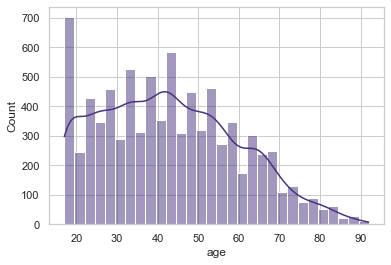

In [137]:
sns.histplot(data=test1, x = 'age', kde= True) 
#SUIS PAS UNE LOI NORMAL

<AxesSubplot:xlabel='age', ylabel='Count'>

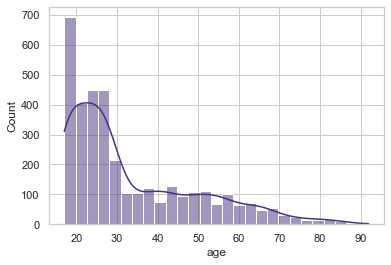

In [138]:
sns.histplot(data=test2, x = 'age', kde=True) 
# NE SUIS PAS UNE LOI NORMAL

In [139]:
sm.stats.diagnostic.kstest_normal(cat0, dist='norm', pvalmethod='table')
#h0 suis une loi normal
#ha ne suis pas une loi normal
#resultat p value 0.0009999999999998899 est inferieur a 0.05 donc on rejette h0 et accepte ha donc ne suis pas une loi normal

(0.04826579327553471, 0.0009999999999998899)

In [140]:
sm.stats.diagnostic.kstest_normal(cat1, dist='norm', pvalmethod='table')
#h0 suis une loi normal
#ha ne suis pas une loi normal
#resultat p value 0.0009999999999998899 est inferieur a 0.05 donc on rejette h0 et accepte ha donc ne suis pas une loi normal

(0.06259504057251243, 0.0009999999999998899)

In [141]:
sm.stats.diagnostic.kstest_normal(cat2, dist='norm', pvalmethod='table')
#h0 suis une loi normal
#ha ne suis pas une loi normal
#resultat p value 0.0009999999999998899 est inferieur a 0.05 donc on rejette h0 et accepte ha donc ne suis pas une loi normal

(0.21068713939665118, 0.0009999999999998899)

In [142]:
stat.bartlett(cat0,cat1 ,cat2)
#h0 il y a une egalite de variance entre les categories : 
#ha il a une difference d'egalite de variance entre les categories
#resultat p value 0.008842815419050798 est inferieur a 0.05 donc on rejette h0 et accepte ha donc il y a une difference  d'egalité de variance entre les categories

BartlettResult(statistic=9.456299933441246, pvalue=0.008842815419050798)

In [143]:
stat.levene(cat0, cat1, cat2, center='median')
#h0 il y a une egalite de variance entre les categories
#ha il a une difference d'egalite de variance entre les categories
#resultat p value pvalue=1.24004547203357e-18 est inferieur a 0.05 donc on rejette h0 et accepte ha donc il y a une difference  d'egalité de variance entre les categories

LeveneResult(statistic=41.31679699977967, pvalue=1.24004547203357e-18)

les echantillons sont independants


chaque echantillon doit avoir une distribution normal : faux vs test de kolmogorov

La variance entre chaque groue doit etre egale : faux vs test de bartlett et levene

Par consequent il faut utiliser un test de kruskall wallis


In [144]:
stat.kruskal(cat0, cat1, cat2)
#h0 il y a un lien entre l'age et les categories 
#ha il y a pas de lien entre l'age et les categories
#resultat : p value pvalue=1.7083760954350866e-272 est inferieur a 0.05 donc  VRAI on rejete  h0 et accepte ha donc il y a pas de lien entre l'age et la categorie achetée

KruskalResult(statistic=1251.5352040537264, pvalue=1.7083760954350866e-272)

<a id='section14'></a>
# <big><font face="'Montserrat'" color="#440154">LIAISON ENTRE L AGE ET LA FREQUENCE ACHAT</font></big>

In [145]:
freqachatmensuel= dffinalsb2b.groupby(['client_id','age', 'annee','mois']).size().reset_index(name= 'freq')
freqachatmensuel = freqachatmensuel.groupby(['client_id','age']).mean()['freq'].reset_index(name= 'freq')
freqachatmensuel.head()
#frequence d achat par mois par client sans b2b

,client_id,age,freq
0,c_1,66.0,2.294118
1,c_10,65.0,3.625000
2,c_100,29.0,1.600000
3,c_1000,55.0,5.681818
4,c_1001,39.0,5.100000


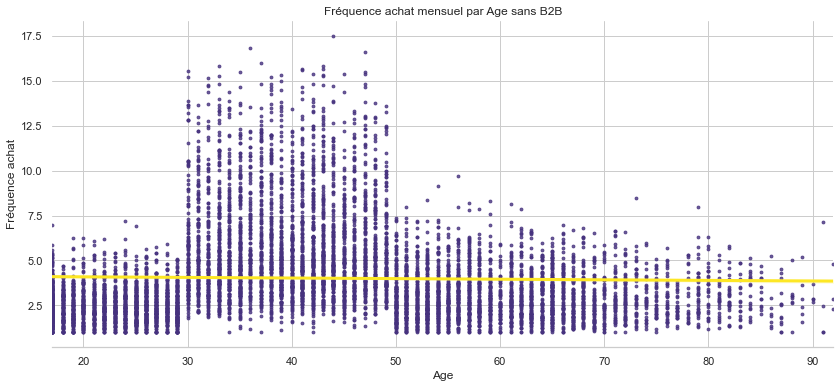

In [146]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
graphagefreq = sns.regplot(data=freqachatmensuel, x="age", y ="freq", line_kws={'lw': 3, 'color': '#fde725'},scatter_kws={'s':8})
graphagefreq.set(xlabel='Age', ylabel='Fréquence achat', title='Fréquence achat mensuel par Age sans B2B')
sns.despine(top= True, right= True, left = True)
#representation graphique de la frequence d'achat par mois par client sans b2b 

<a id='section15'></a>
# <big><font face="'Montserrat'" color="#440154">ANALYSE PARTIE 2</font></big>

In [147]:
cc= dffinalsb2b[['id_prod','session_id','client_id','sex','birth','montant_en_euros','categ','annee','mois','age']]
cc.head()
#semection des colonnes utiles pour recreer un dataframe pour les analyses

,id_prod,session_id,client_id,sex,birth,montant_en_euros,categ,annee,mois,age
0,0_1518,s_211425,c_103,f,1986.0,4.18,0,2022.0,5.0,35.0
1,0_1518,s_64849,c_103,f,1986.0,4.18,0,2021.0,7.0,35.0
2,0_1518,s_255965,c_103,f,1986.0,4.18,0,2022.0,8.0,35.0
12,0_1518,s_214775,c_7456,f,1985.0,4.18,0,2022.0,5.0,36.0
13,0_1518,s_125853,c_7456,f,1985.0,4.18,0,2021.0,11.0,36.0


In [148]:
cc.copy
#creation d une copie

<bound method NDFrame.copy of        id_prod session_id client_id  sex   birth  montant_en_euros categ  \
0       0_1518   s_211425     c_103    f  1986.0              4.18     0   
1       0_1518    s_64849     c_103    f  1986.0              4.18     0   
2       0_1518   s_255965     c_103    f  1986.0              4.18     0   
12      0_1518   s_214775    c_7456    f  1985.0              4.18     0   
13      0_1518   s_125853    c_7456    f  1985.0              4.18     0   
...        ...        ...       ...  ...     ...               ...   ...   
679371  0_1624        NaN       NaN  NaN     NaN             24.50     0   
679372    2_86        NaN       NaN  NaN     NaN            132.36     2   
679373   0_299        NaN       NaN  NaN     NaN             22.99     0   
679374   0_510        NaN       NaN  NaN     NaN             23.66     0   
679375  0_2308        NaN       NaN  NaN     NaN             20.28     0   

         annee  mois   age  
0       2022.0   5.0  35.0  

In [149]:
c2= cc.groupby(['client_id','sex'])['montant_en_euros'].sum().reset_index(name="panier")
c2.head()
#création d'une partie du nouveau dataframe

,client_id,sex,panier
0,c_1,m,558.18
1,c_10,m,1353.60
2,c_100,m,254.85
3,c_1000,f,2261.89
4,c_1001,m,1812.86


In [150]:
c3= cc.groupby(['client_id'])['montant_en_euros'].mean().reset_index(name="pvm")
c3.head()
#création d'une autre partie du nouveau dataframe

,client_id,pvm
0,c_1,14.312308
1,c_10,23.337931
2,c_100,31.856250
3,c_1000,18.095120
4,c_1001,17.773137


In [151]:
construction = pd.merge(c2, c3, how="left", on=["client_id", "client_id"])
construction.head()
# union des données du nouveau dataframe

,client_id,sex,panier,pvm
0,c_1,m,558.18,14.312308
1,c_10,m,1353.60,23.337931
2,c_100,m,254.85,31.856250
3,c_1000,f,2261.89,18.095120
4,c_1001,m,1812.86,17.773137


In [152]:
c5 =cc.groupby(['client_id'])['age'].value_counts().reset_index(name="test")
c5.drop('test', axis=1, inplace=True)
c5.head()
#création d'une partie du nouveau dataframe

,client_id,age
0,c_1,66.0
1,c_10,65.0
2,c_100,29.0
3,c_1000,55.0
4,c_1001,39.0


In [153]:
construction = pd.merge(construction, c5, how="left", on=["client_id", "client_id"])
construction.head()
# union des données du nouveau dataframe

,client_id,sex,panier,pvm,age
0,c_1,m,558.18,14.312308,66.0
1,c_10,m,1353.60,23.337931,65.0
2,c_100,m,254.85,31.856250,29.0
3,c_1000,f,2261.89,18.095120,55.0
4,c_1001,m,1812.86,17.773137,39.0


In [154]:
c6= cc.groupby(['client_id'])['session_id'].value_counts().reset_index(name="panier_nbre_art")
c6.head()
#création d'une partie du nouveau dataframe

,client_id,session_id,panier_nbre_art
0,c_1,s_114737,5
1,c_1,s_120172,2
2,c_1,s_327424,2
3,c_1,s_105105,1
4,c_1,s_134971,1


In [155]:
c7= tpm2[['client_id','nbre']]
#création d'une partie du nouveau dataframe

In [156]:
construction = pd.merge(construction, c7, how="left", on=["client_id", "client_id"])
construction.head()
# union des données du nouveau dataframe

,client_id,sex,panier,pvm,age,nbre
0,c_1,m,558.18,14.312308,66.0,1.181818
1,c_10,m,1353.60,23.337931,65.0,1.705882
2,c_100,m,254.85,31.856250,29.0,1.600000
3,c_1000,f,2261.89,18.095120,55.0,1.344086
4,c_1001,m,1812.86,17.773137,39.0,2.170213


In [157]:
c8=freqachatmensuel[['client_id','freq']]
#création d'une partie du nouveau dataframe

In [158]:
construction = pd.merge(construction, c8, how="left", on=["client_id", "client_id"])
construction.head()
# union des données du nouveau dataframe

,client_id,sex,panier,pvm,age,nbre,freq
0,c_1,m,558.18,14.312308,66.0,1.181818,2.294118
1,c_10,m,1353.60,23.337931,65.0,1.705882,3.625000
2,c_100,m,254.85,31.856250,29.0,1.600000,1.600000
3,c_1000,f,2261.89,18.095120,55.0,1.344086,5.681818
4,c_1001,m,1812.86,17.773137,39.0,2.170213,5.100000


In [159]:
construction= construction[['client_id','age','sex','panier','pvm','nbre','freq']]
# nouveau dataframe finalisé

In [160]:
construction.corr()
#corrélation du dataframe

,age,panier,pvm,nbre,freq
age,1.000000,-0.185967,-0.513061,-0.212840,-0.022181
panier,-0.185967,1.000000,0.093316,0.121262,0.781811
pvm,-0.513061,0.093316,1.000000,-0.322175,-0.366952
nbre,-0.212840,0.121262,-0.322175,1.000000,0.462901
freq,-0.022181,0.781811,-0.366952,0.462901,1.000000


# <big><font face="'Montserrat'" color="#440154">corrélation des différents indicateurs quantitatifs</font></big>

Text(0.5, 1.0, 'Corrélation de pearson')

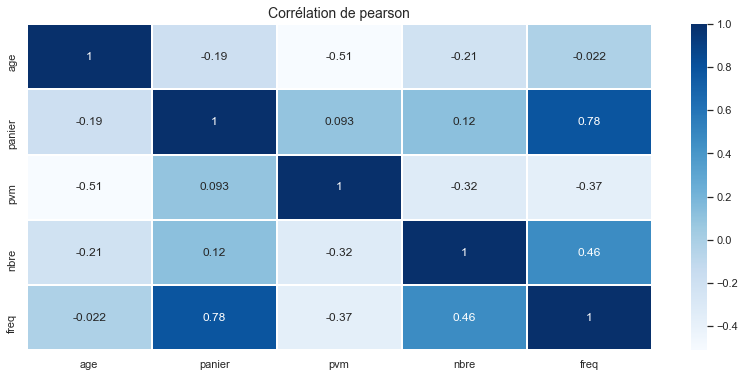

In [161]:
plt.figure(figsize=(14,6))
cpf = construction.corr(method='pearson')
sns.heatmap(cpf, annot = True, cmap= 'Blues',linewidths=.8)
plt.title("Corrélation de pearson", fontsize = 14)
#corrélation entre les differents indicateurs des clients : age, panier global, panier moyen, nre d'achats par session, fréquence d'achat mensuel.

Text(0.5, 1.0, 'Corrélation de spearman')

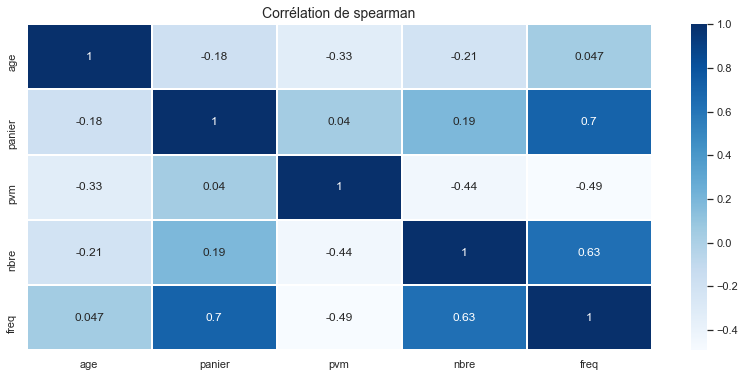

In [162]:
plt.figure(figsize=(14,6))
cpf = construction.corr(method='spearman')
sns.heatmap(cpf, annot = True, cmap= 'Blues',linewidths=.8)
plt.title("Corrélation de spearman", fontsize = 14)
#corrélation entre les differents indicateurs des clients : age, panier global, panier moyen, nre d'achats par session, fréquence d'achat mensuel.

<a id='section16'></a>
# <big><font face="'Montserrat'" color="#440154">ANALYSE PARTIE 3</font></big>

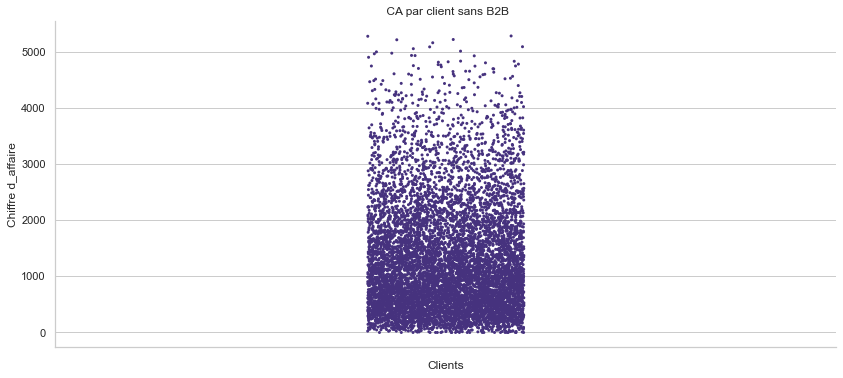

In [163]:
plt.figure(figsize=(14,6))
sns.set_palette("viridis")
graphSSB2B1 = sns.stripplot(data=construction, y ='panier',size=3)
graphSSB2B1.set(xlabel='Clients', ylabel='Chiffre d_affaire' ,title=' CA par client sans B2B')
sns.despine(top= True, right= True)
#graph en nuage de point mettant en visuel le montant depensé par client sans le b2b

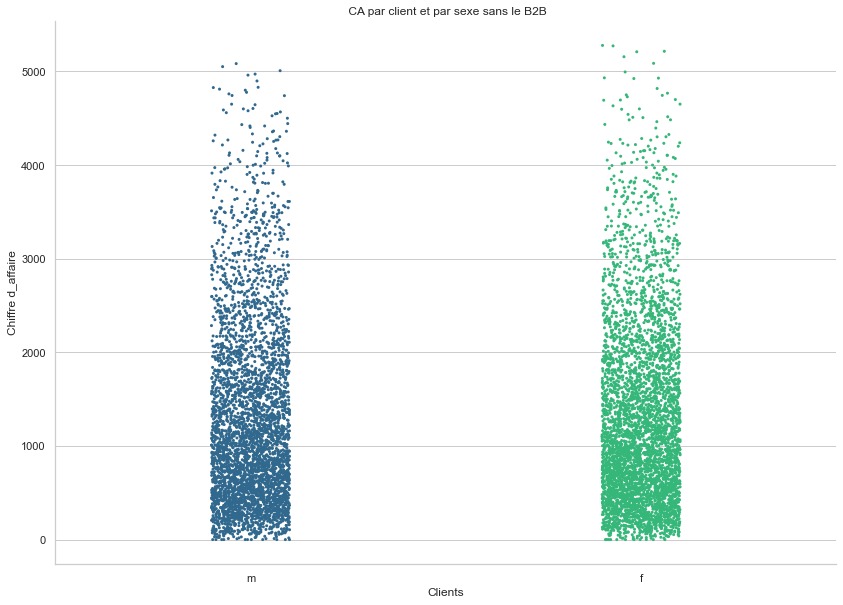

In [164]:
plt.figure(figsize=(14,10))
sns.set_palette("viridis")
graph2SSB2B2  = sns.stripplot(data=construction, x='sex', y ='panier',palette="viridis",size=3)
graph2SSB2B2 .set(xlabel = 'Clients',ylabel='Chiffre d_affaire', title=' CA par client et par sexe sans le B2B')
sns.despine(top= True, right= True)
#graph en nuage de point mettant en visualisation le panier global sans le b2b par sexe

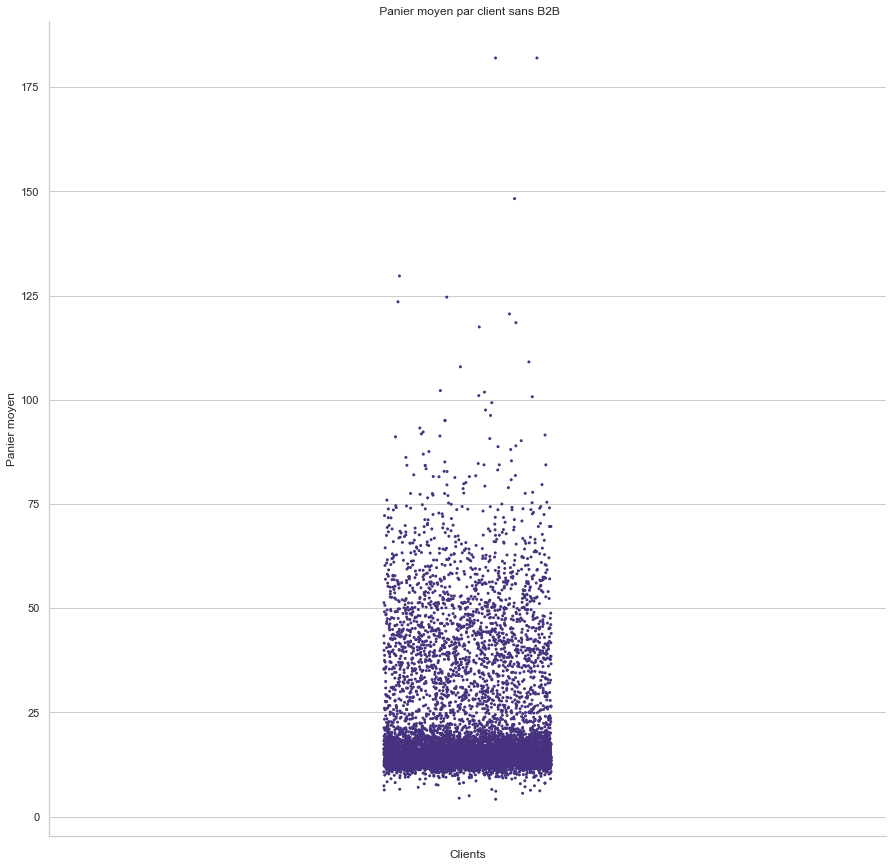

In [165]:
plt.figure(figsize=(15,15))
sns.set_palette("viridis")
graphbg3bc = sns.stripplot(data=construction, y ='pvm',size=3)
graphbg3bc.set(xlabel='Clients', ylabel='Panier moyen', title=' Panier moyen par client sans B2B')
sns.despine(top= True, right= True)
#graph en nuage de point mettant en visualisation le panier moyen sans le b2b par client

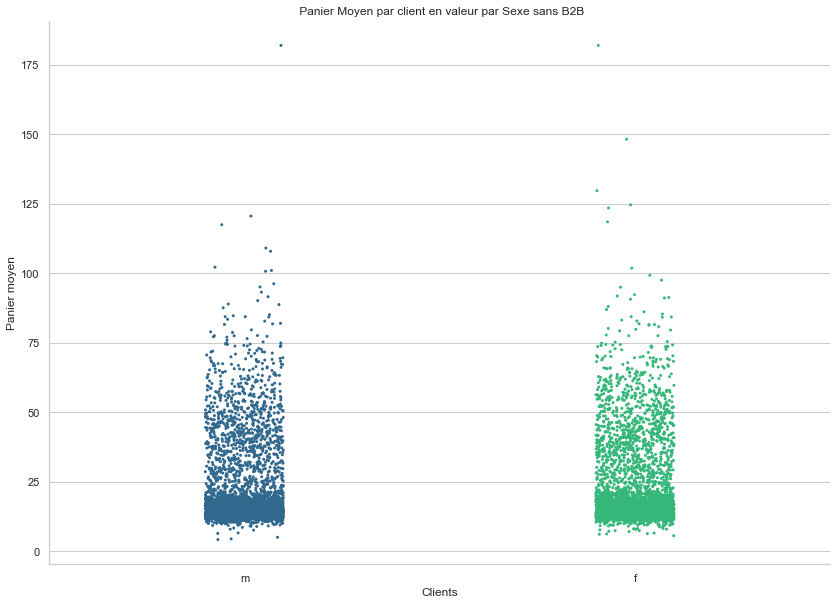

In [166]:
plt.figure(figsize=(14,10))
sns.set_palette("viridis")
graphbg3bb4 = sns.stripplot(data=construction, x='sex', y ='pvm',palette="viridis",size=3)
graphbg3bb4.set(xlabel = 'Clients',ylabel='Panier moyen', title=' Panier Moyen par client en valeur par Sexe sans B2B')
sns.despine(top= True, right= True)
#forte concentration de petit pvm en dessous de 25 € quelque soit le sexe et femme avec un pvm supp sans le b2b

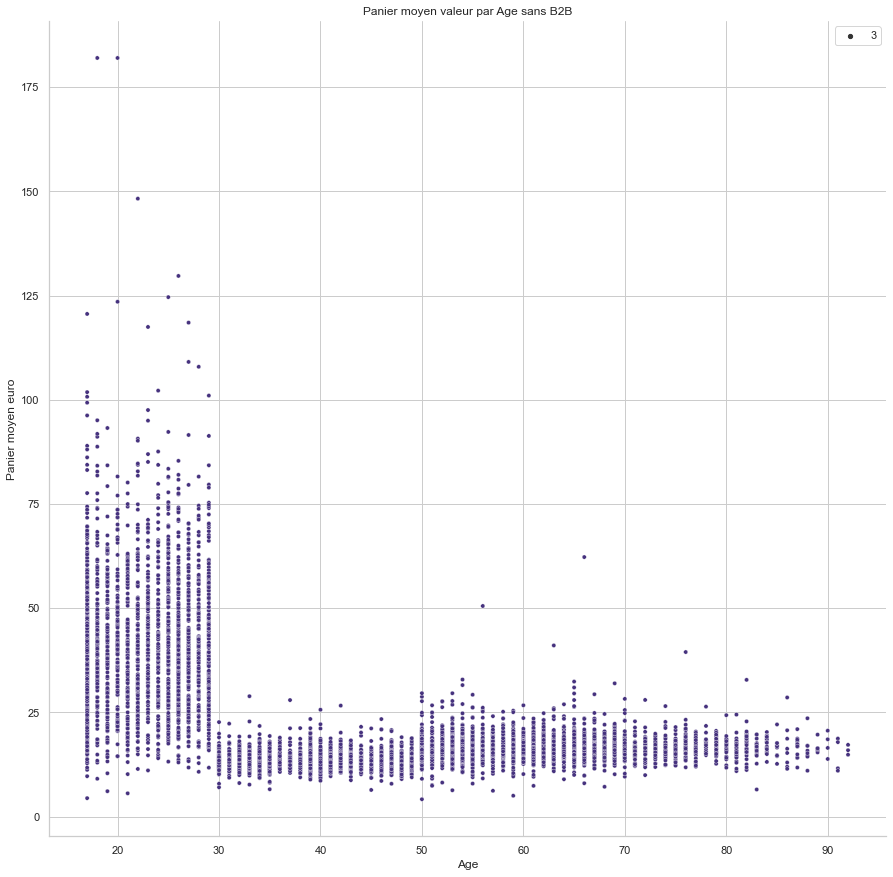

In [167]:
plt.figure(figsize=(15,15))
sns.set_palette("viridis")
sns.set_style("whitegrid")
graphbg4ab = sns.scatterplot(data=construction, x="age", y ="pvm",size=3)
graphbg4ab.set(xlabel='Age', ylabel='Panier moyen euro', title='Panier moyen valeur par Age sans B2B')
sns.despine(top= True, right= True)
#panier moyen par age sans b2b

In [168]:
dfsex =construction['sex'].value_counts().reset_index()

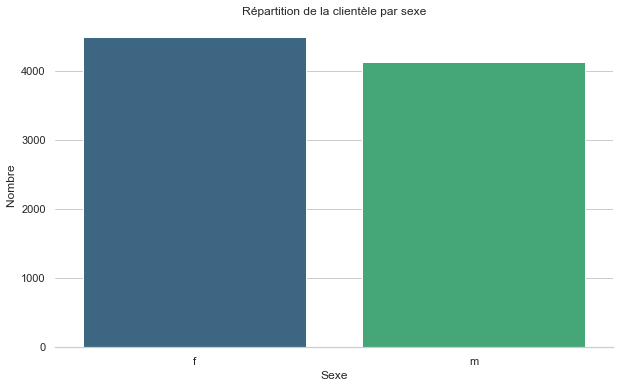

In [169]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
graphdfsex = sns.barplot(x='index', y= 'sex', data= dfsex , palette = 'viridis')
graphdfsex .set(xlabel='Sexe', ylabel='Nombre ', title='Répartition de la clientèle par sexe')
sns.despine(top= True, right= True,  left=True)
#representation graphique de la répartition de la clientèle

In [170]:
dfsex2 = (construction['sex'].value_counts()/construction['sex'].count())*100
print(dfsex2)
#calcul de la répartition de la clientèle

f    52.09421
m    47.90579
Name: sex, dtype: float64
